In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
import warnings
from sklearn.decomposition import PCA
import Processor

In [11]:
# path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\train.csv"
path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\train_FD001.csv"
test_path =  r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Documents\GitHub\ME_5984-Final-Project\test_FD001.csv"

# test_path = r"C:\Users\venablecrofta\OneDrive - Virginia Tech\Desktop\Classes\S25\Project\PHM08\test.csv"
# column_names_1 = ['id', 'cycles', 'setting_1', 'setting_2', 'setting_3']
# column_names_2 = [f"s_{x}" for x in range(1, 22)]
# column_names = column_names_1 + column_names_2


# df_train = pd.read_csv(path, header=None, delimiter=r"\s+")
# df_train.head()

# df_train = df.set_axis(column_names, axis=1)
# df_train.head()
index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)

100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycles     20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s_1        20631 non-null  float64
 6   s_2        20631 non-null  float64
 7   s_3        20631 non-null  float64
 8   s_4        20631 non-null  float64
 9   s_5        20631 non-null  float64
 10  s_6        20631 non-null  float64
 11  s_7        20631 non-null  float64
 12  s_8        20631 non-null  float64
 13  s_9        20631 non-null  float64
 14  s_10       20631 non-null  float64
 15  s_11       20631 non-null  float64
 16  s_12       20631 non-null  float64
 17  s_13       20631 non-null  float64
 18  s_14       20631 non-null  float64
 19  s_15       20631 non-null  float64
 20  s_

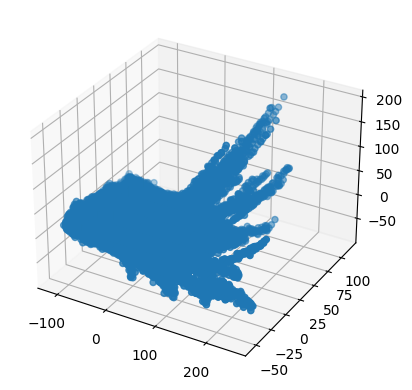

In [22]:
df_train.head()
print(len(df_train['id'].unique()))
df_train.info()
fig =plt.figure()
ax = fig.add_subplot(projection='3d')

pca = PCA(n_components=3)
fit_data = pca.fit_transform(df_train)
ax.scatter(fit_data[:,0],fit_data[:,1], fit_data[:,2])

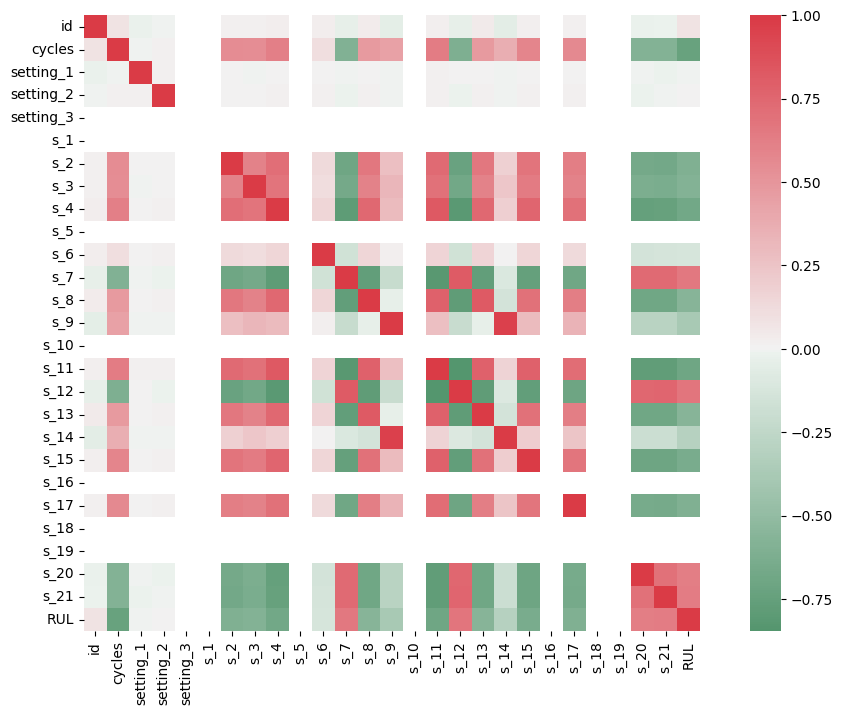

In [7]:
plt.figure(figsize=(13,8))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df_train.corr(), cmap =cmap, center=0, annot=False, square=True);

In [21]:
scaler = MinMaxScaler()

# Scale only the sensor columns for training and test data
df_train_scaled_sensors = scaler.fit_transform(df_train[sensor_names])
df_test_scaled_sensors = scaler.transform(df_test[sensor_names])

# Create new DataFrames with only the scaled sensor data
scaled_sensors_train = pd.DataFrame(df_train_scaled_sensors, columns=sensor_names)
scaled_sensors_test = pd.DataFrame(df_test_scaled_sensors, columns=sensor_names)

# Combine with the non-sensor columns from the original DataFrames
normalized_train = pd.concat([
    df_train.drop(columns=sensor_names).reset_index(drop=True),
    scaled_sensors_train
], axis=1)

normalized_test = pd.concat([
    df_test.drop(columns=sensor_names).reset_index(drop=True),
    scaled_sensors_test
], axis=1)

# Now you can drop the columns you don't want
columns_to_drop = ['cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
train_RUL = Processor.calculate_RUL(normalized_train)
test_RUL = Processor.calculate_RUL(normalized_test)

In [19]:
df_train_copy = train_RUL.drop(columns=columns_to_drop)

df_train_copy.head()

id       s_2       s_3       s_4       s_7       s_8       s_9      s_11  \
0   1  0.183735  0.406802  0.309757  0.726248  0.242424  0.109755  0.369048   
1   1  0.283133  0.453019  0.352633  0.628019  0.212121  0.100242  0.380952   
2   1  0.343373  0.369523  0.370527  0.710145  0.272727  0.140043  0.250000   
3   1  0.343373  0.256159  0.331195  0.740741  0.318182  0.124518  0.166667   
4   1  0.349398  0.257467  0.404625  0.668277  0.242424  0.149960  0.255952   

       s_12      s_13      s_14      s_15      s_17      s_20      s_21  RUL  
0  0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662  191  
1  0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014  190  
2  0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375  189  
3  0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386  188  
4  0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502  187

In [23]:

df_test_copy= test_RUL.drop(columns=columns_to_drop)
df_test_copy.head()

id       s_2       s_3       s_4       s_7       s_8       s_9      s_11  \
0   1  0.545181  0.310661  0.269413  0.652174  0.212121  0.127614  0.208333   
1   1  0.150602  0.379551  0.222316  0.805153  0.166667  0.146684  0.386905   
2   1  0.376506  0.346632  0.322248  0.685990  0.227273  0.158081  0.386905   
3   1  0.370482  0.285154  0.408001  0.679549  0.196970  0.105717  0.255952   
4   1  0.391566  0.352082  0.332039  0.694042  0.166667  0.102396  0.273810   

       s_12      s_13      s_14      s_15      s_17      s_20      s_21  RUL  
0  0.646055  0.220588  0.132160  0.308965  0.333333  0.558140  0.661834   30  
1  0.739872  0.264706  0.204768  0.213159  0.416667  0.682171  0.686827   29  
2  0.699360  0.220588  0.155640  0.458638  0.416667  0.728682  0.721348   28  
3  0.573561  0.250000  0.170090  0.257022  0.250000  0.666667  0.662110   27  
4  0.737740  0.220588  0.152751  0.300885  0.166667  0.658915  0.716377   26

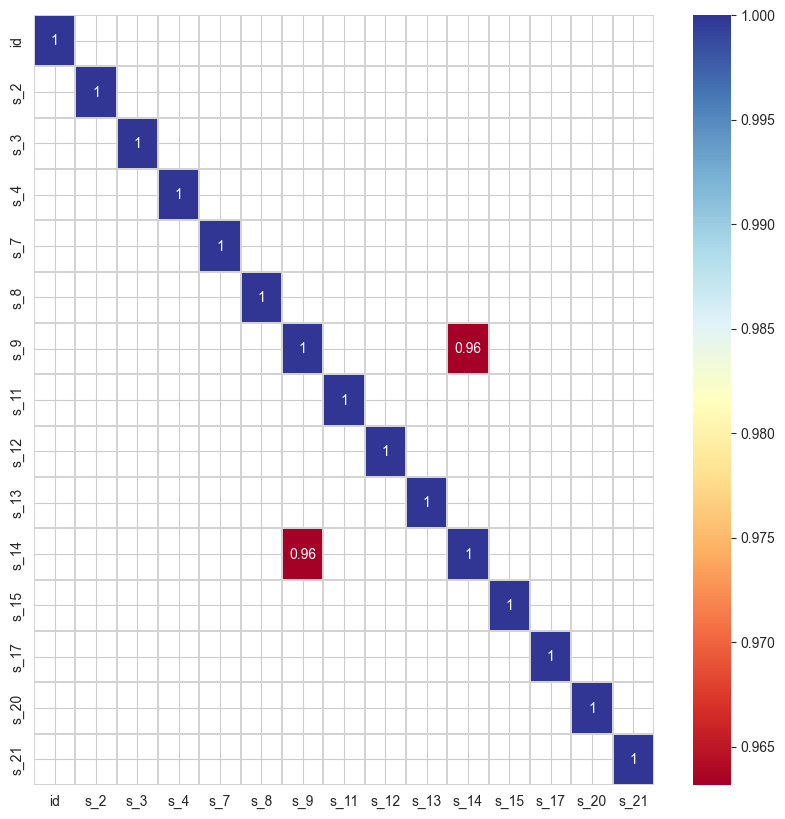

In [6]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df_train_copy.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

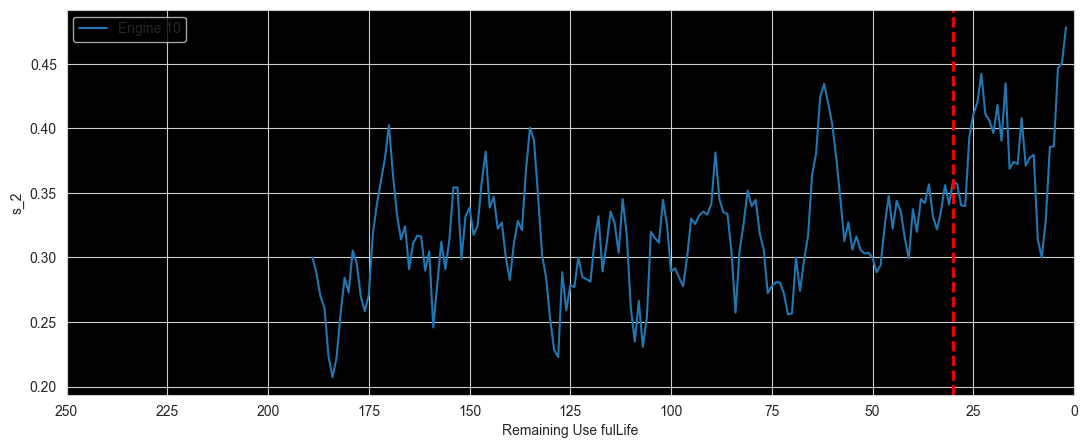

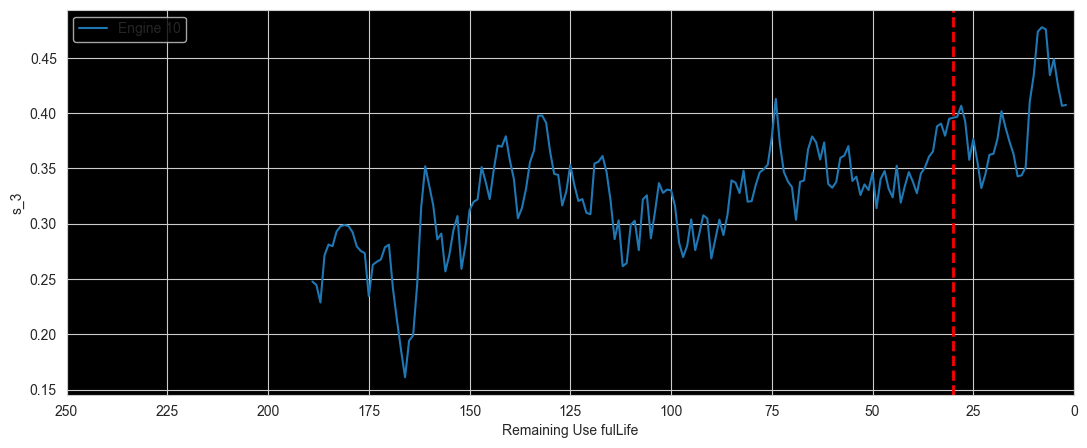

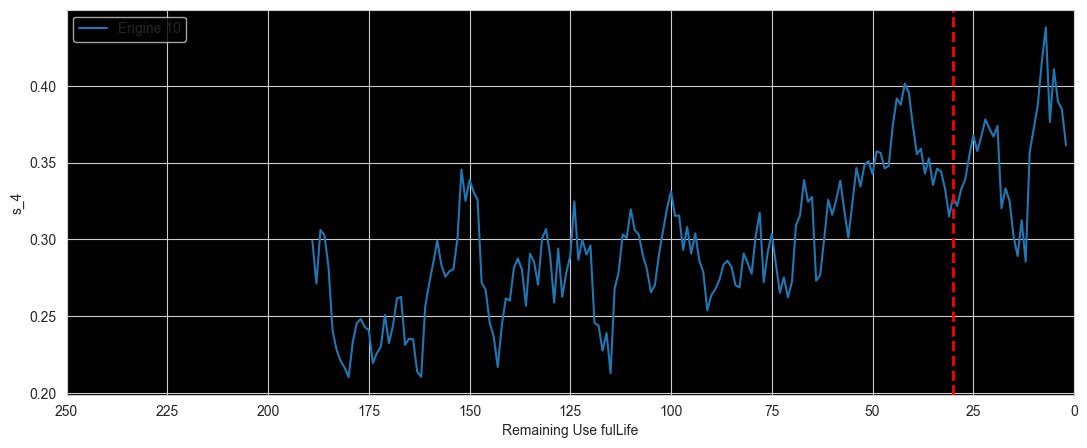

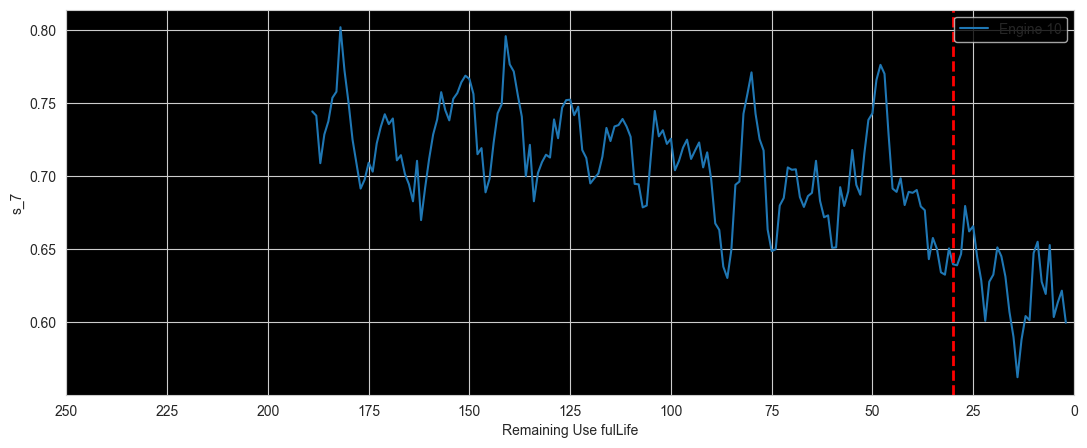

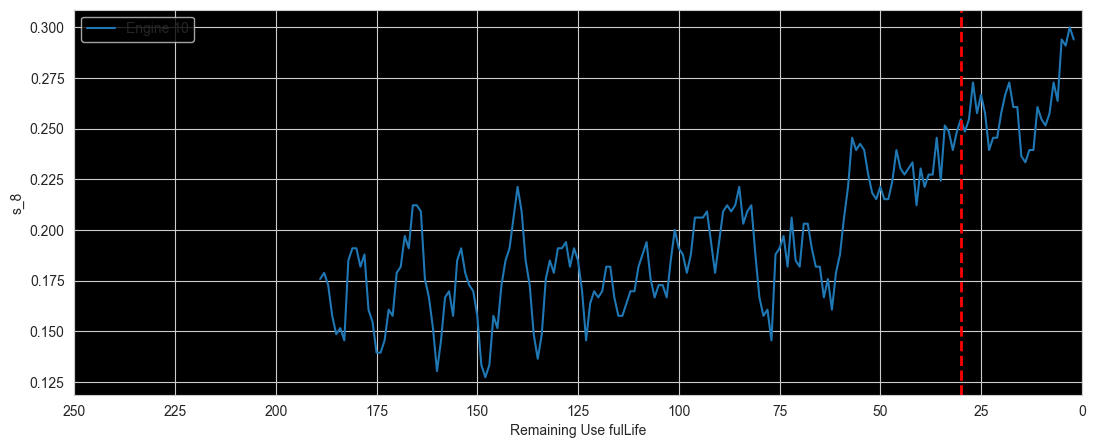

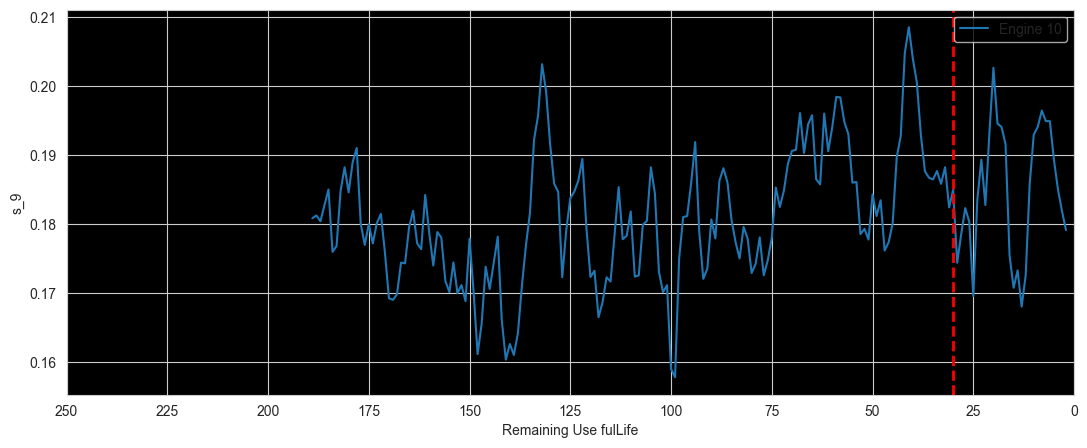

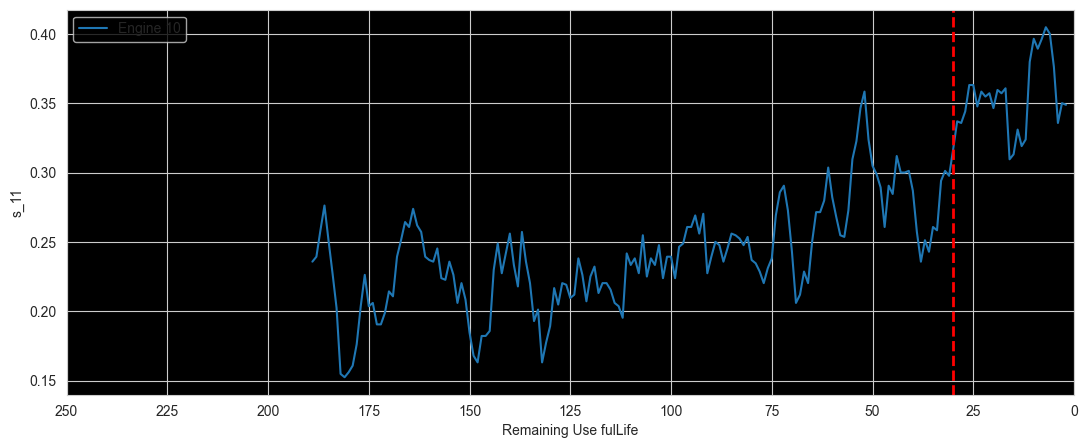

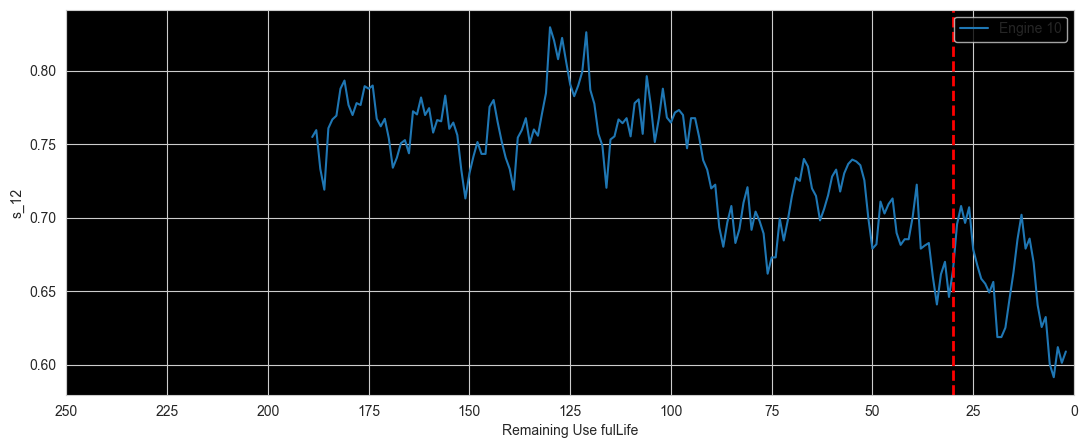

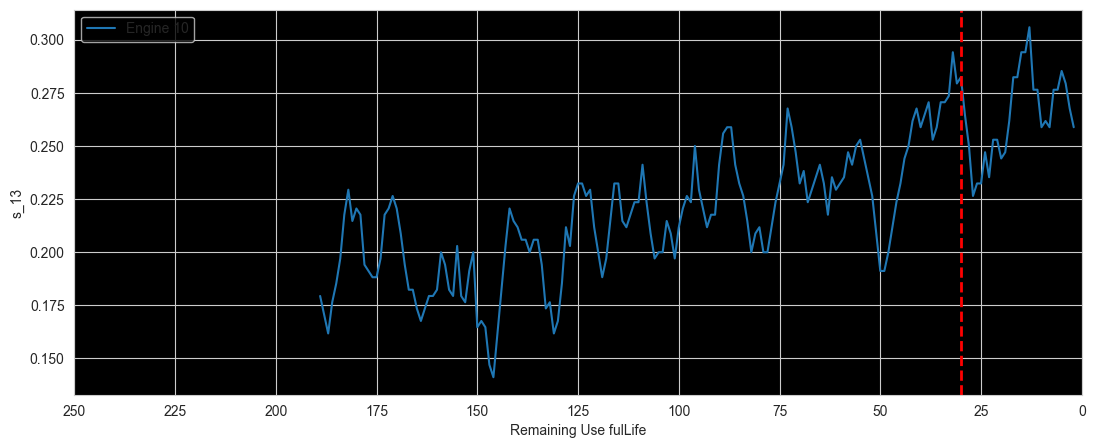

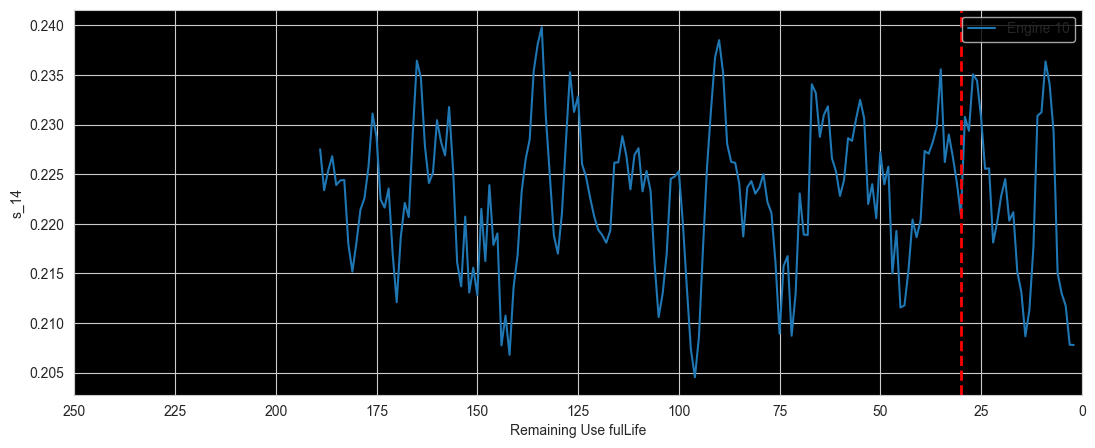

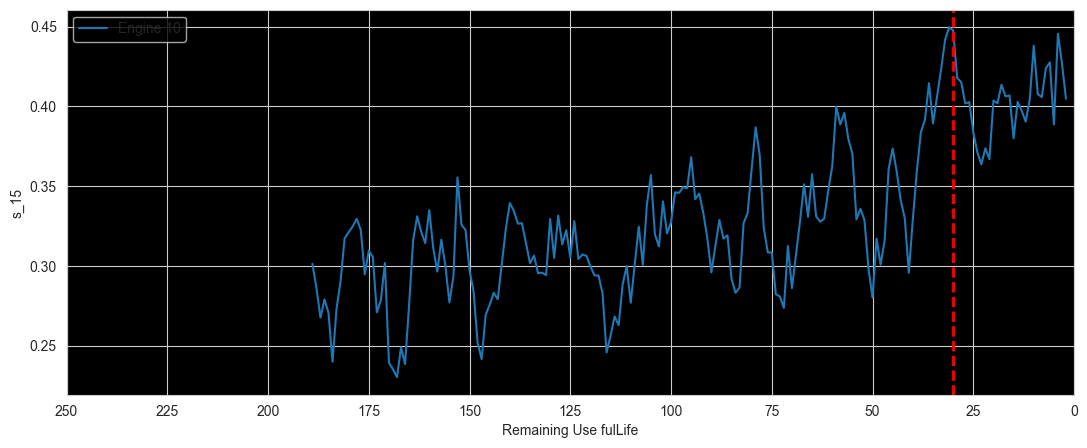

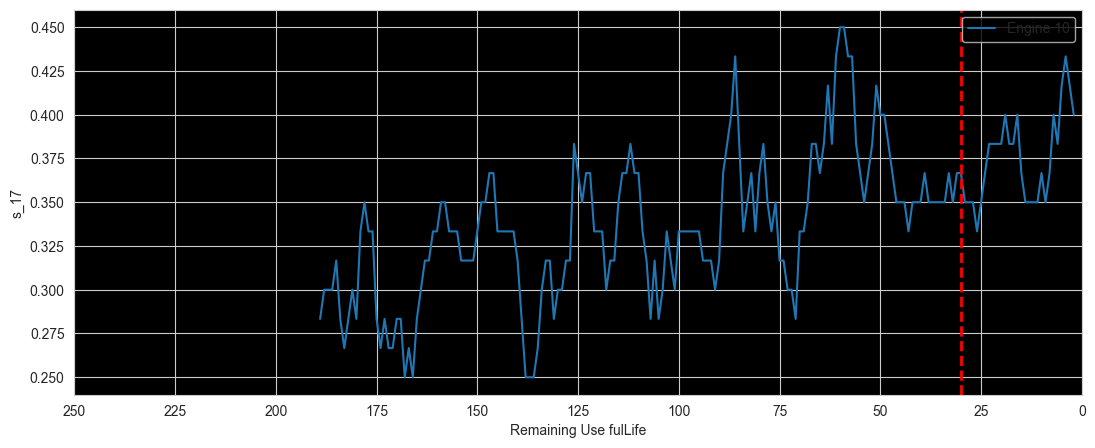

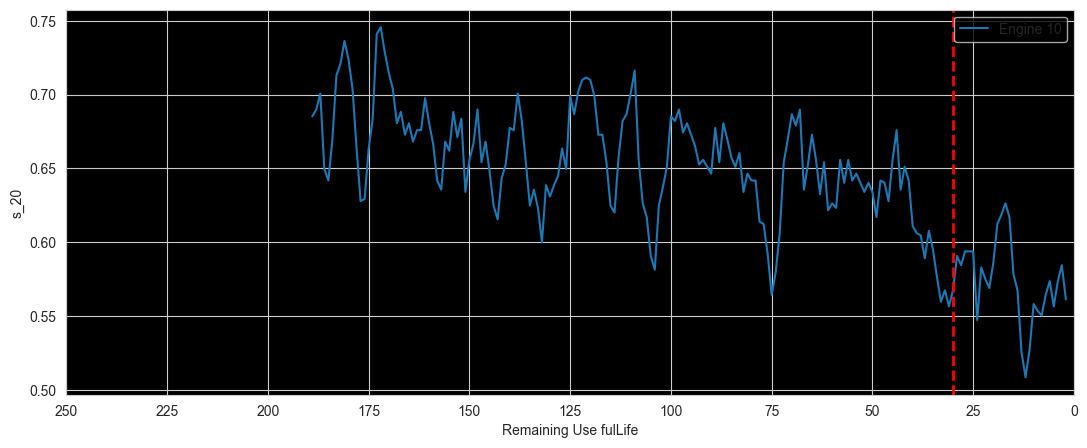

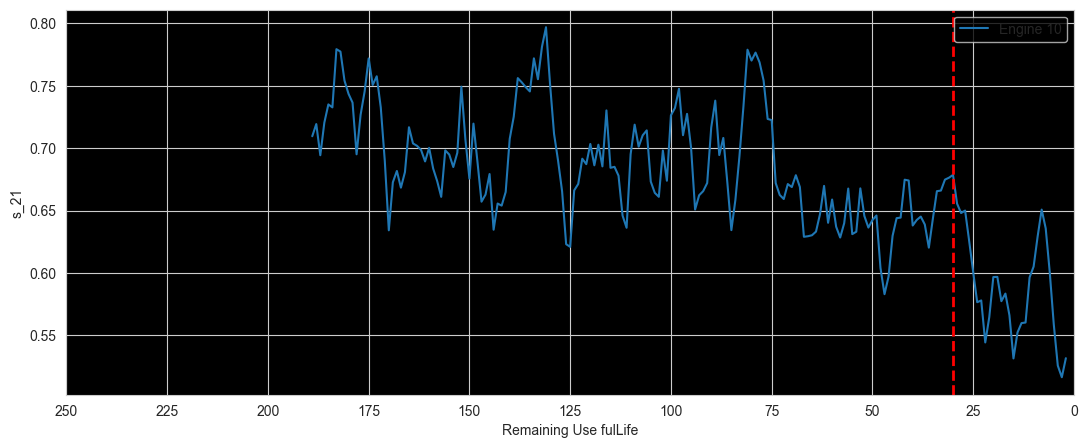

In [27]:
def plot_sensor(sensor_name,X):
    plt.figure(figsize=(13,5))
    for i in X['id'].unique():
        if i == 10:
#             continue
#         if (i % 10 == 0):  # only plot every engine
            plt.plot('RUL', sensor_name, 
                     data=X[X['id']==i].rolling(5).mean(), alpha = 1, label = f'Engine {i}')
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
    plt.rcParams['figure.facecolor'] = 'white'
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.legend()
    plt.show()
    

for sensor in df_test_copy.drop(['id', 'RUL'], axis=1).columns:
    plot_sensor(sensor, df_test_copy)
    

In [29]:
df_train_copy.head()

id       s_2       s_3       s_4       s_7       s_8       s_9      s_11  \
0   1  0.183735  0.406802  0.309757  0.726248  0.242424  0.109755  0.369048   
1   1  0.283133  0.453019  0.352633  0.628019  0.212121  0.100242  0.380952   
2   1  0.343373  0.369523  0.370527  0.710145  0.272727  0.140043  0.250000   
3   1  0.343373  0.256159  0.331195  0.740741  0.318182  0.124518  0.166667   
4   1  0.349398  0.257467  0.404625  0.668277  0.242424  0.149960  0.255952   

       s_12      s_13      s_14      s_15      s_17      s_20      s_21  RUL  
0  0.633262  0.205882  0.199608  0.363986  0.333333  0.713178  0.724662  191  
1  0.765458  0.279412  0.162813  0.411312  0.333333  0.666667  0.731014  190  
2  0.795309  0.220588  0.171793  0.357445  0.166667  0.627907  0.621375  189  
3  0.889126  0.294118  0.174889  0.166603  0.333333  0.573643  0.662386  188  
4  0.746269  0.235294  0.174734  0.402078  0.416667  0.589147  0.704502  187

In [7]:
df_train_copy.drop('s_9', axis = 1, inplace = True)

In [26]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train_copy)


[[-1.72808356 -1.72172539 -0.13425518 ...  1.34849274  1.19442705
   1.20779556]
 [-1.72808356 -1.06177971  0.21152849 ...  1.01652793  1.23692196
   1.19327742]
 [-1.72808356 -0.66181262 -0.41316559 ...  0.73989059  0.50342281
   1.17875927]
 ...
 [ 1.65920407  1.47801126  1.94697106 ... -2.08181033 -3.29248147
  -1.53613393]
 [ 1.65920407  1.09804254  2.40366648 ... -2.91172236 -2.08507166
  -1.55065208]
 [ 1.65920407  2.33794049  1.60771161 ... -2.46910261 -2.19408035
  -1.56517022]]


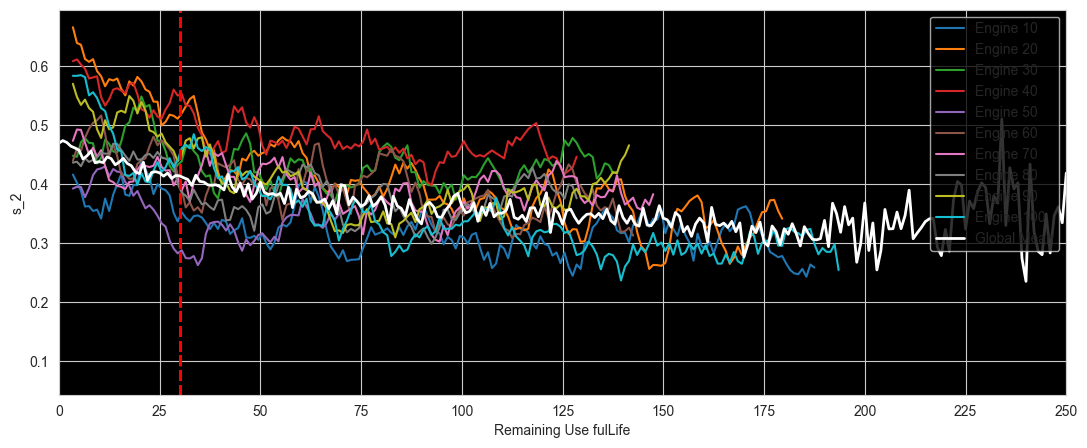

In [26]:
from sklearn.preprocessing import PolynomialFeatures

sensor_cols = [col for col in df_train_copy.columns if col.startswith('s_')]

# Design matrix X (sensors)
sensor_name = 's_2'
X_raw= df_test_copy[['id','s_2','RUL']]# shape (num_samples, num_sensors)

plt.figure(figsize=(13,5))
for i in X_raw['id'].unique():
        if (i % 10 == 0):  # only plot every engine
            single_engine = X_raw[X_raw['id']==i].rolling(8).mean()
            plt.plot('RUL', sensor_name, 
                     data=single_engine, alpha = 1, label = f'Engine {i}')
            plt.axvline(30, color='red', linestyle='dashed', linewidth=2)
global_mean = X_raw.groupby('RUL')[sensor_name].mean()
plt.plot(global_mean.index, global_mean, color='white', label='Global Mean', linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
plt.xlim(0, 250)  # reverse the x-axis so RUL counts down to zero
plt.xticks(np.arange(0, 275, 25))
plt.ylabel(sensor_name)
plt.xlabel('Remaining Use fulLife')
plt.legend()
plt.show()

In [93]:
# x = np.linspace(250, 0, 20)
# X = np.vstack([x**i for i in range(5)]).T


C:\Users\venablecrofta\AppData\Local\Temp\ipykernel_19912\3050484826.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


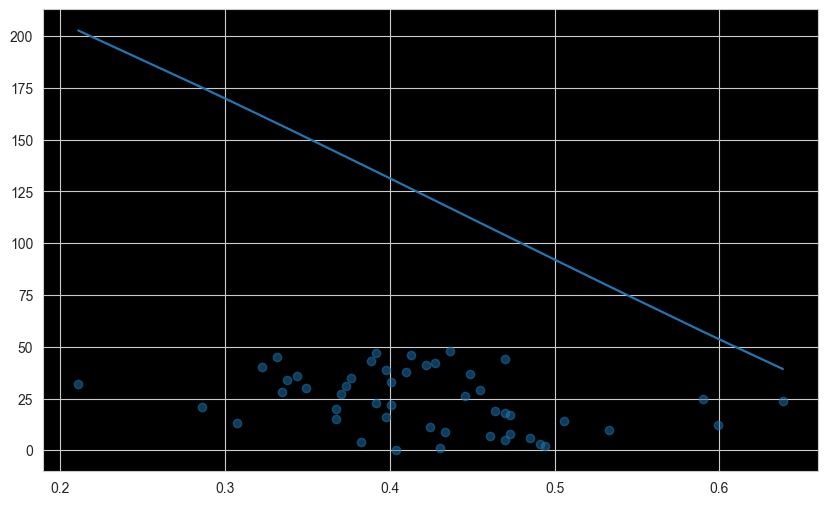

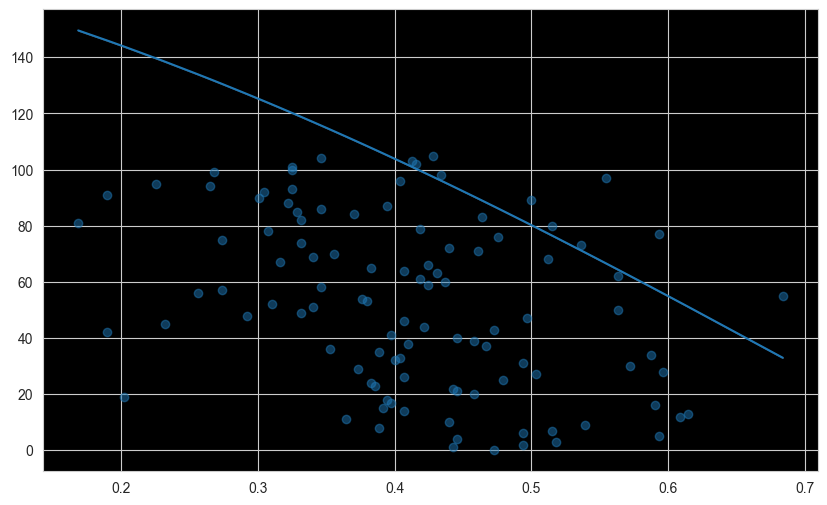

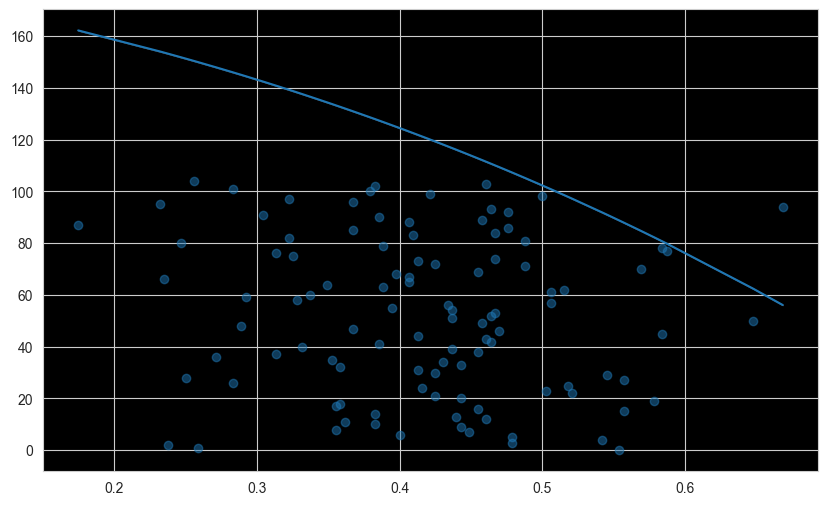

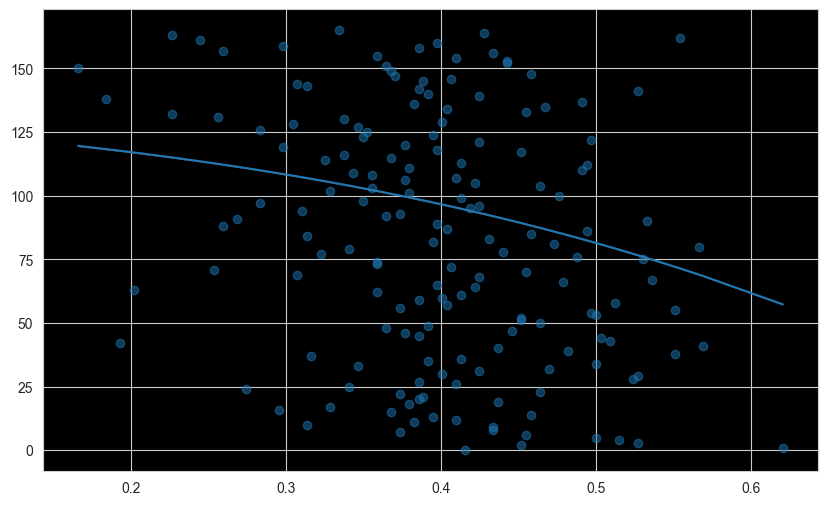

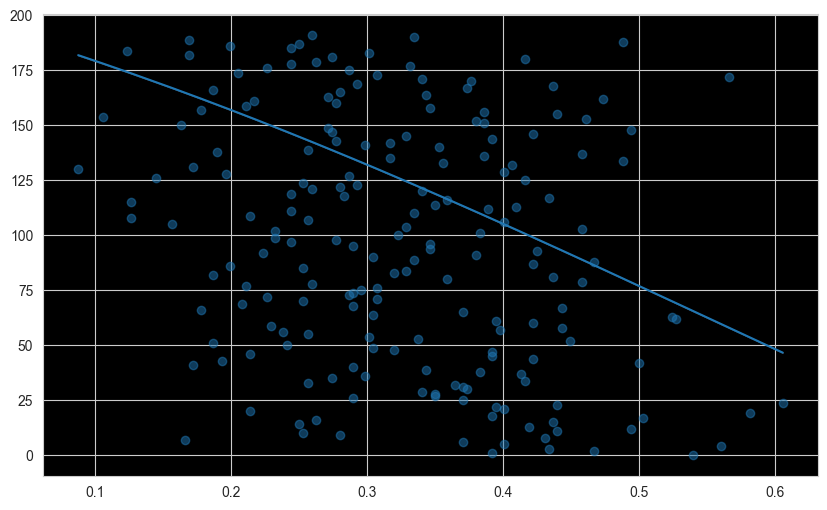

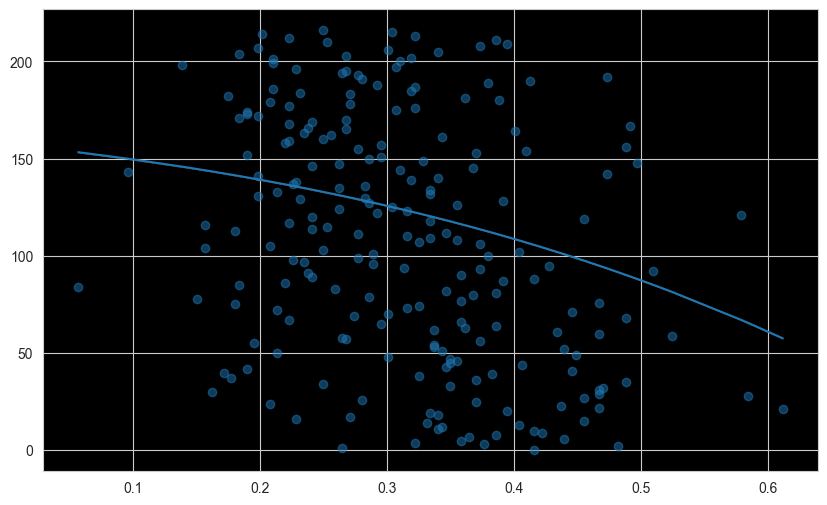

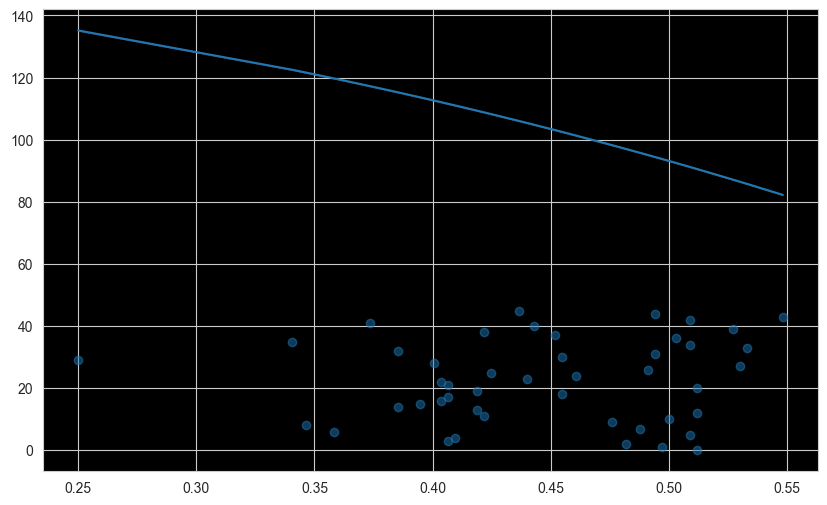

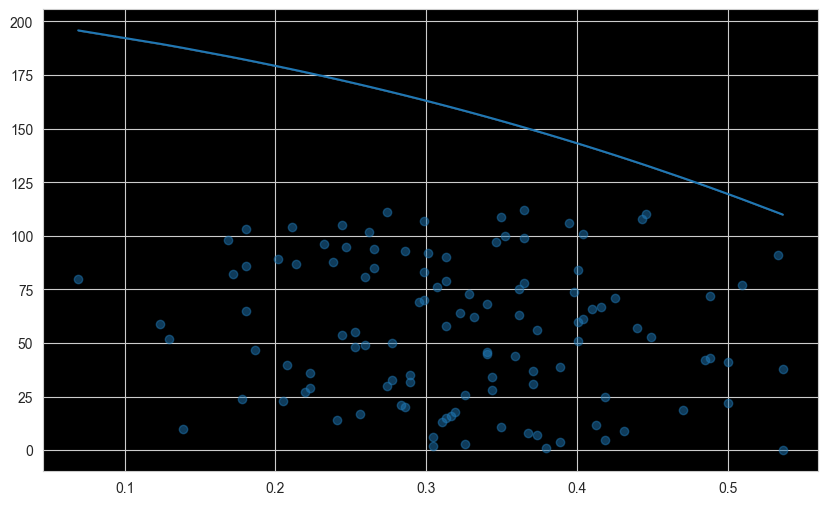

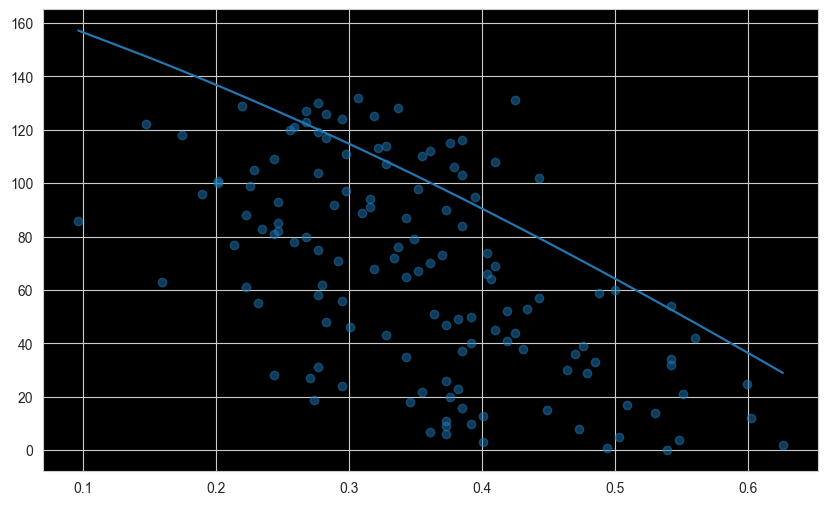

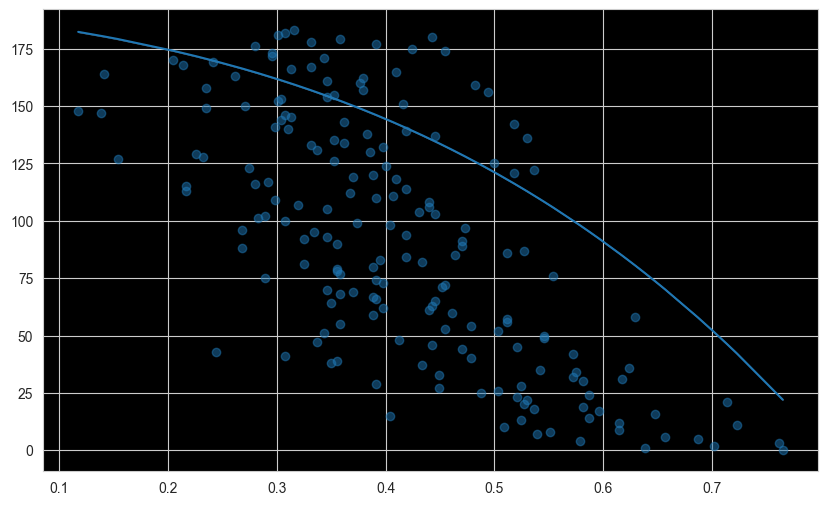

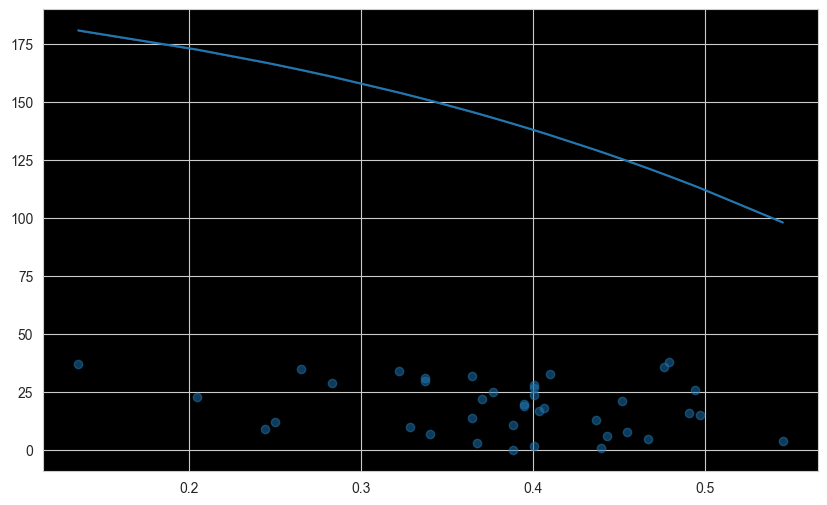

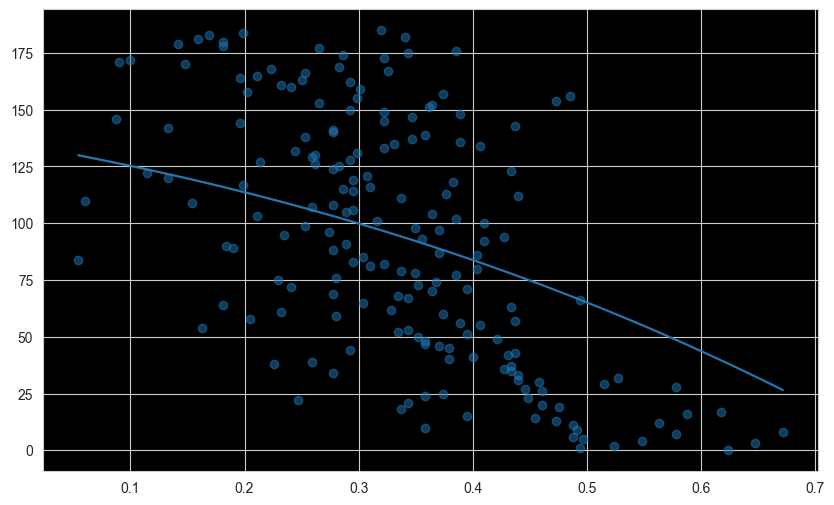

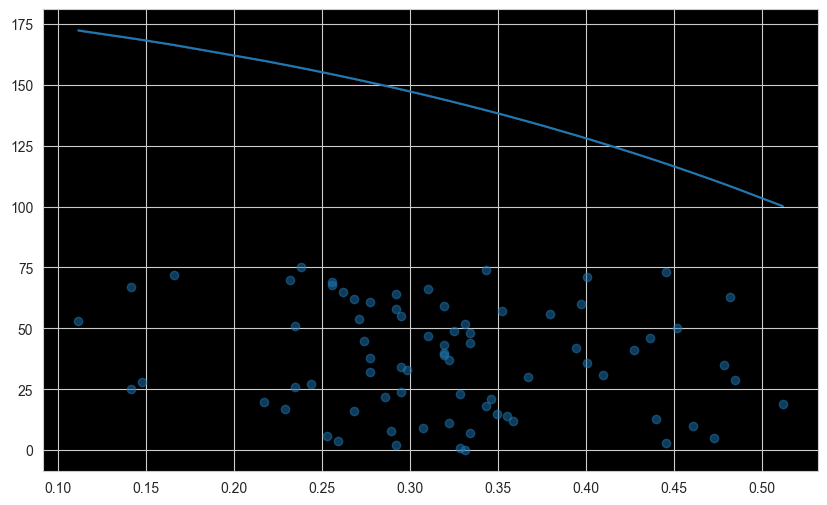

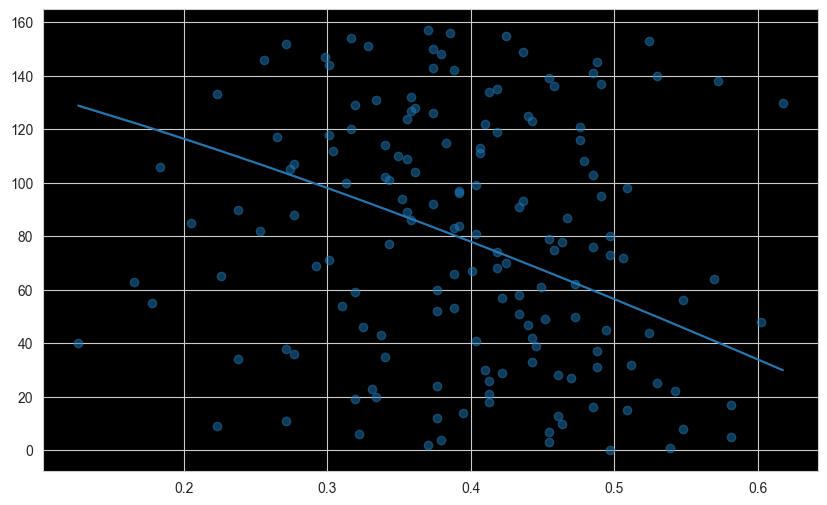

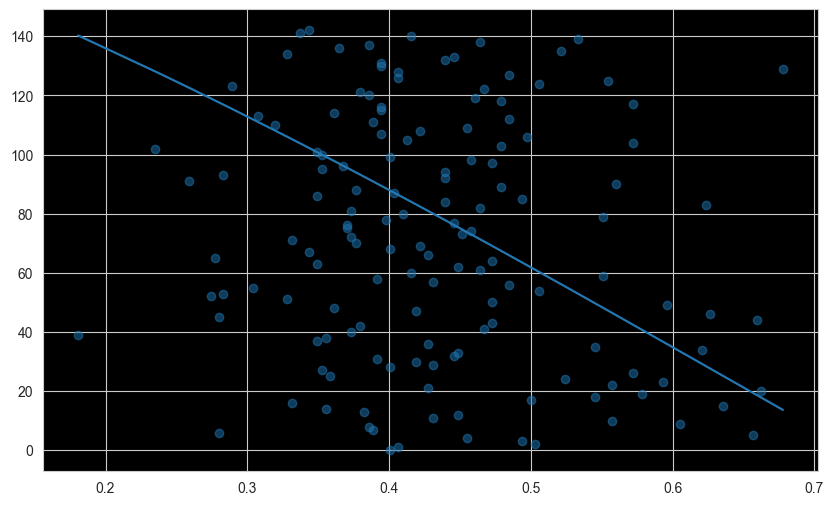

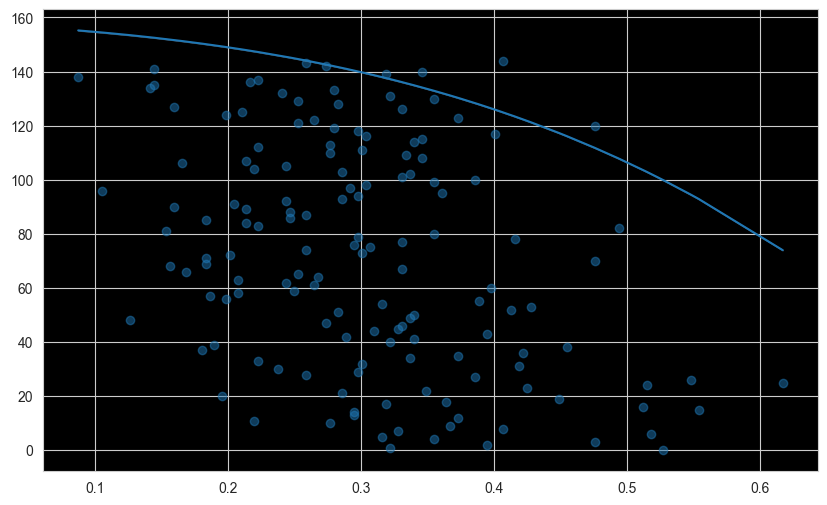

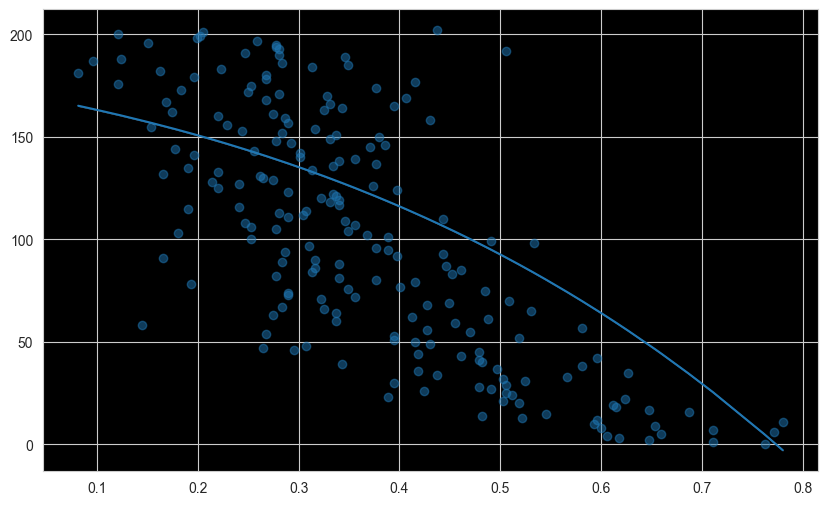

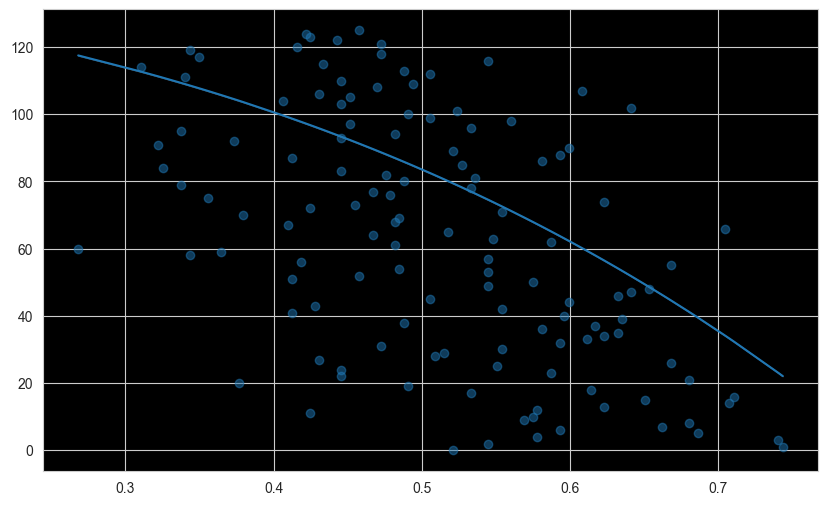

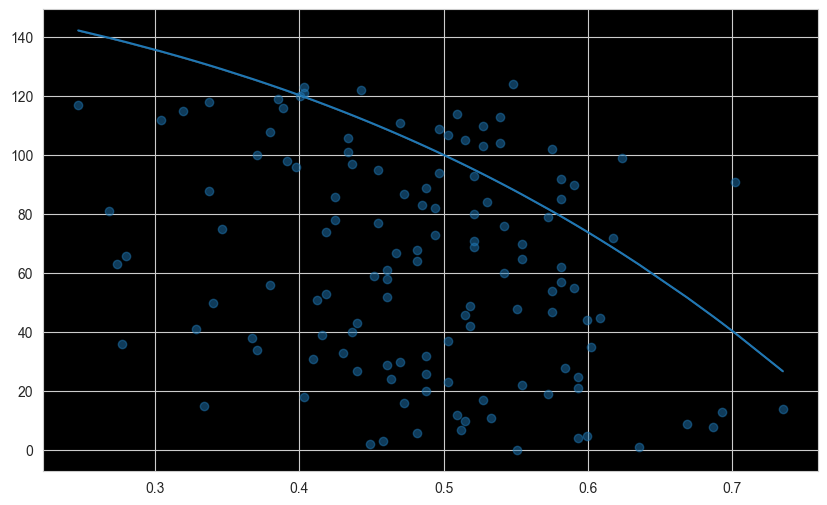

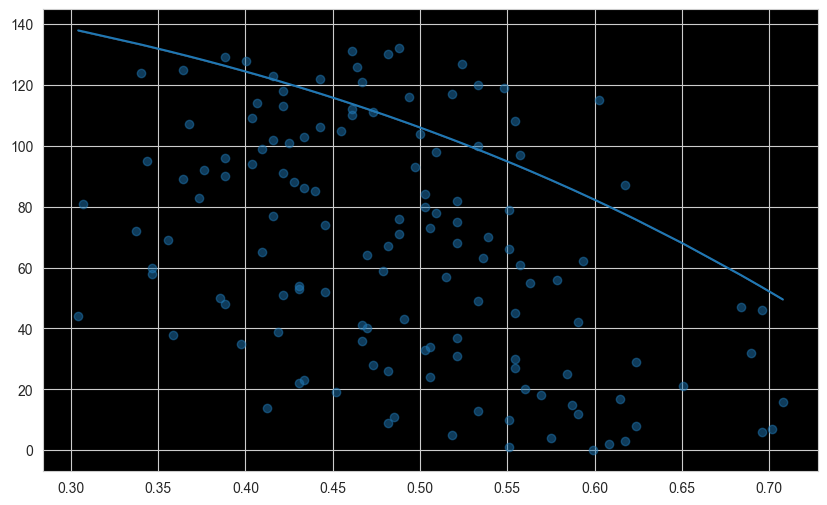

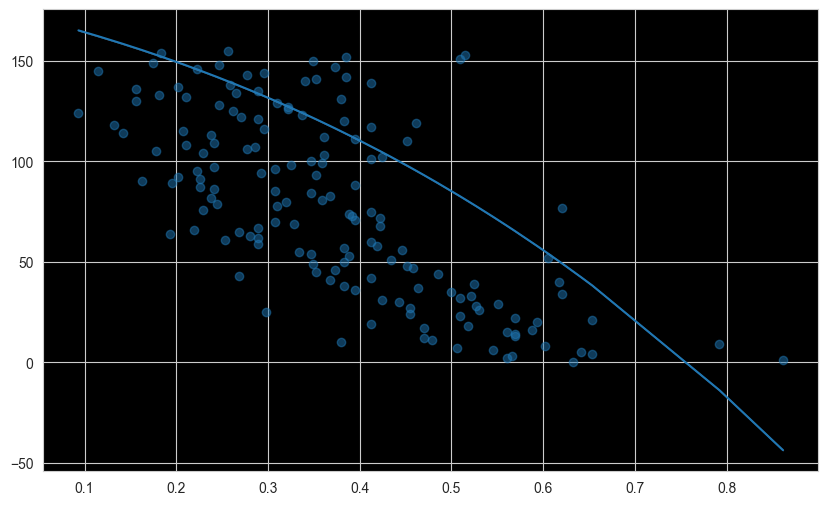

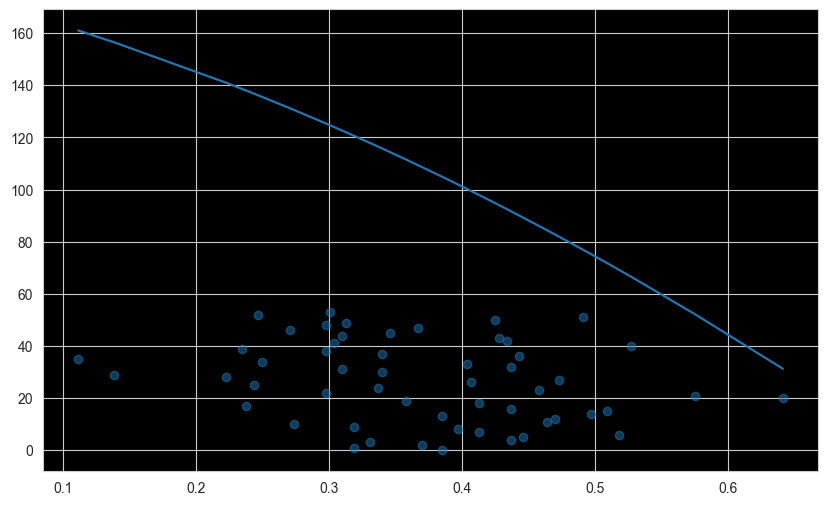

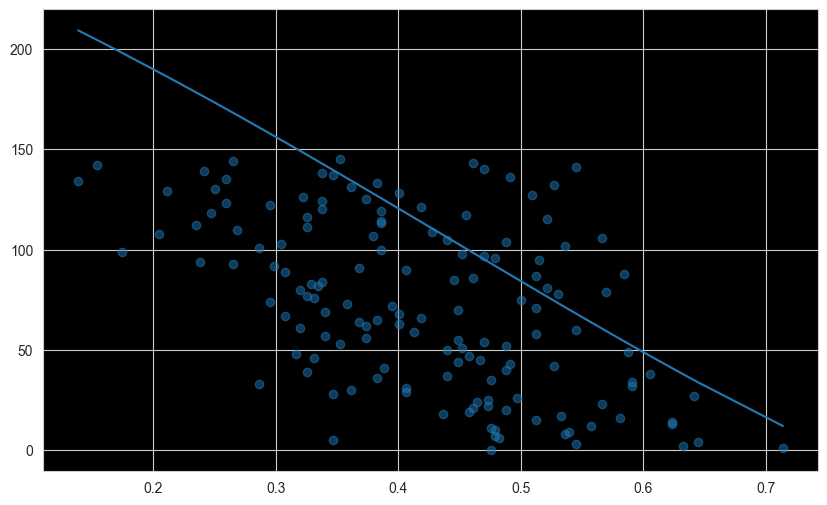

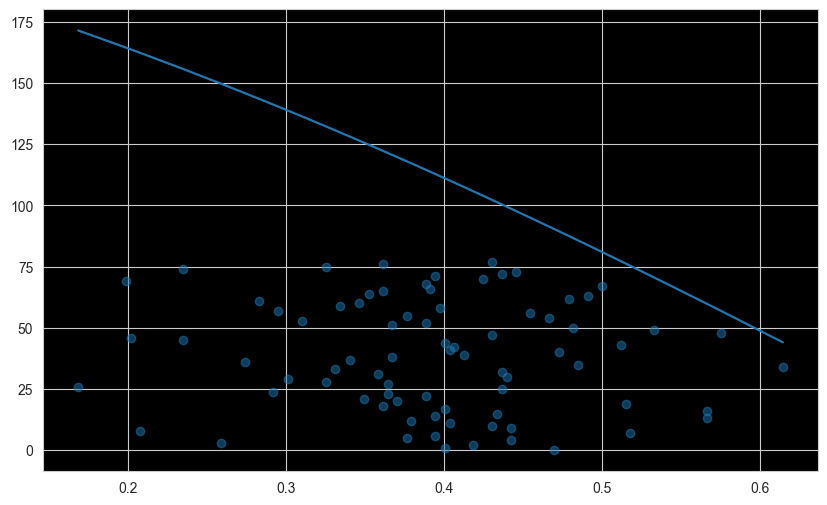

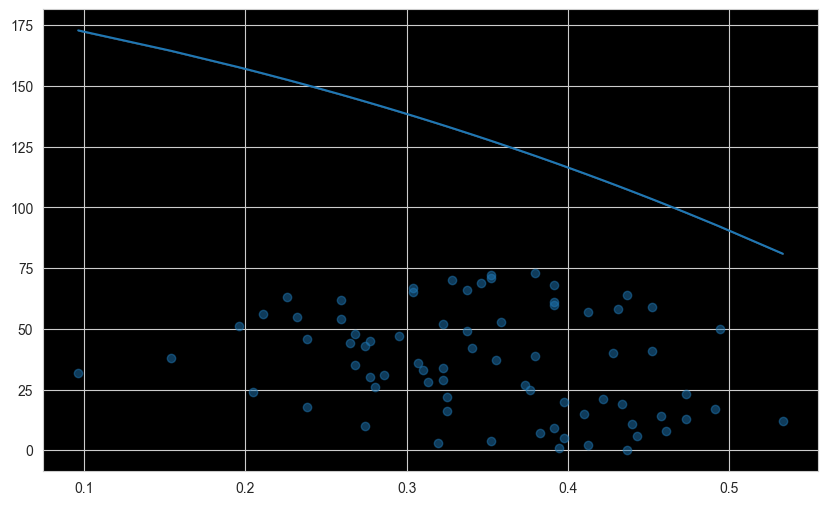

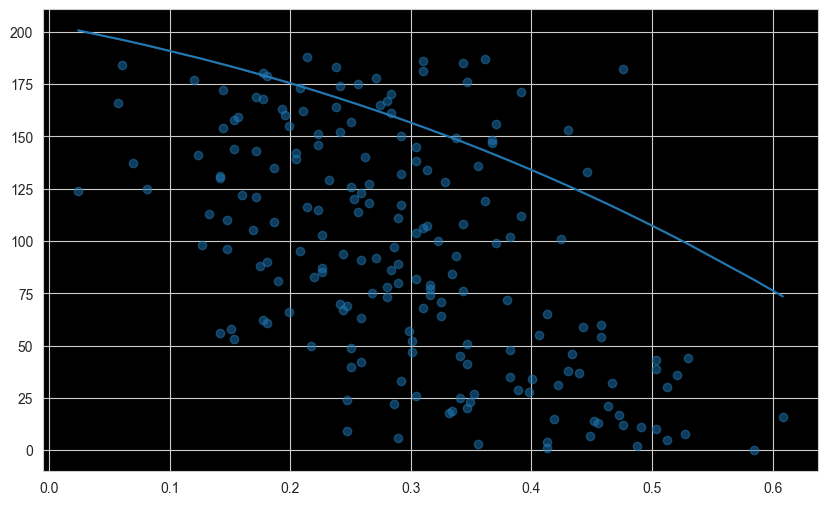

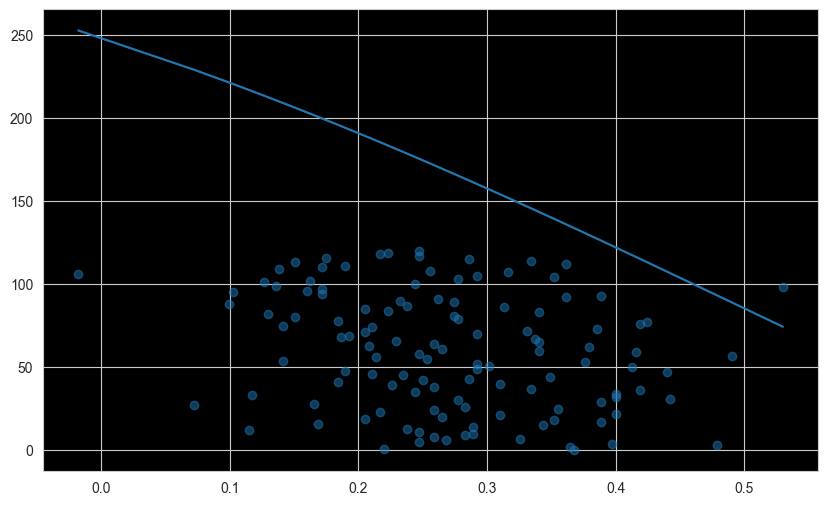

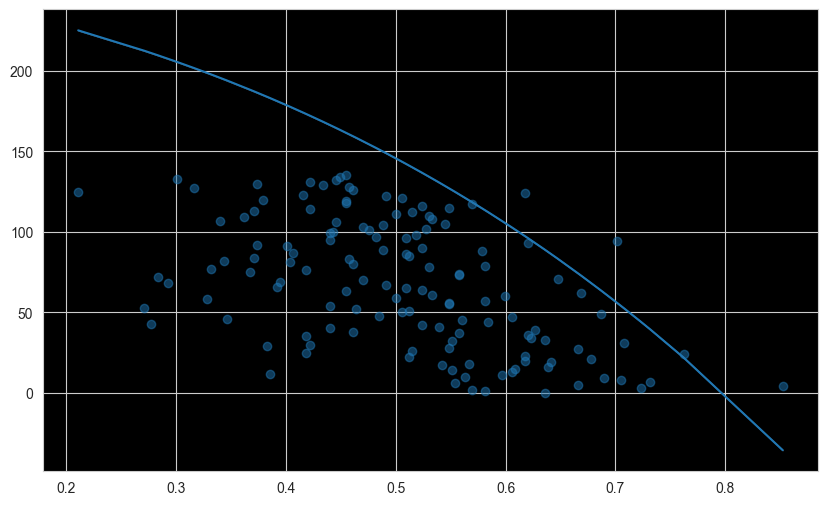

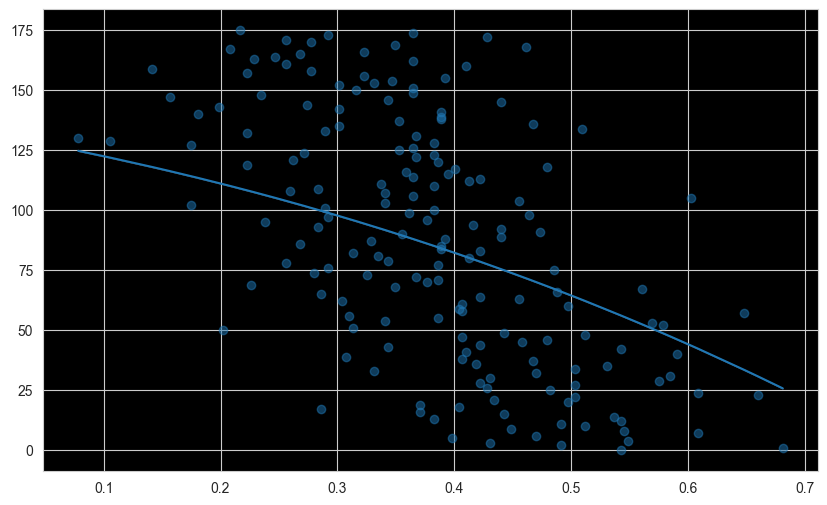

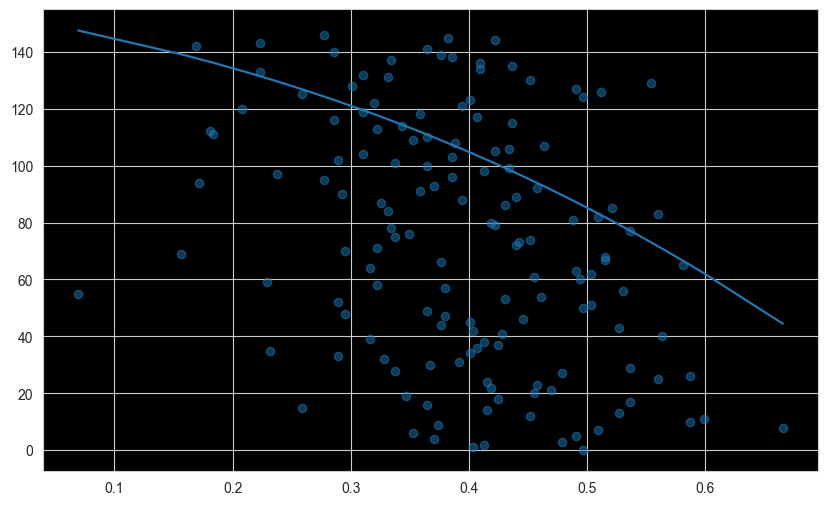

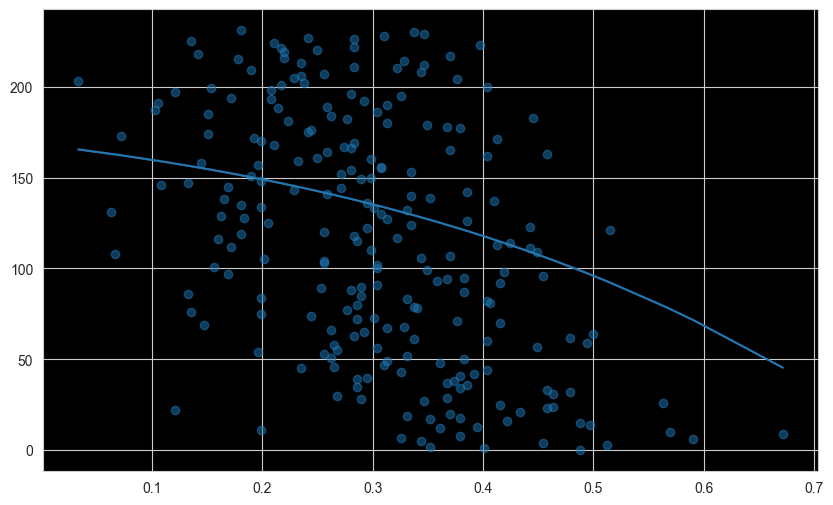

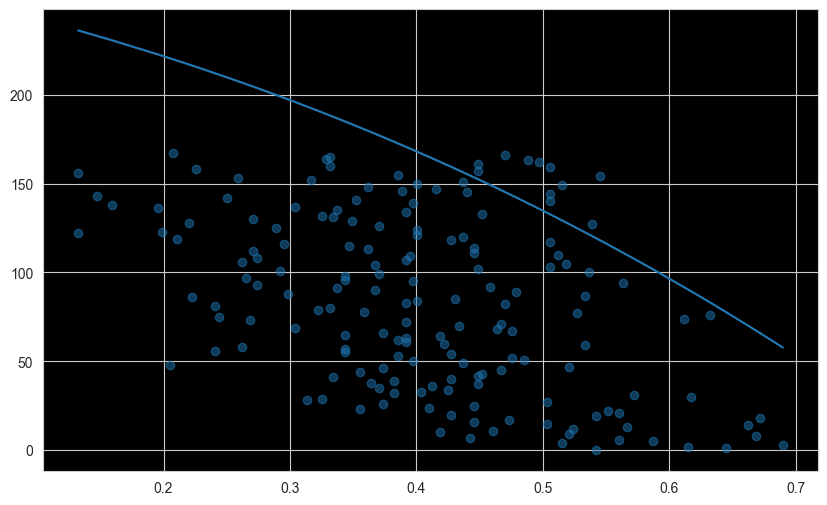

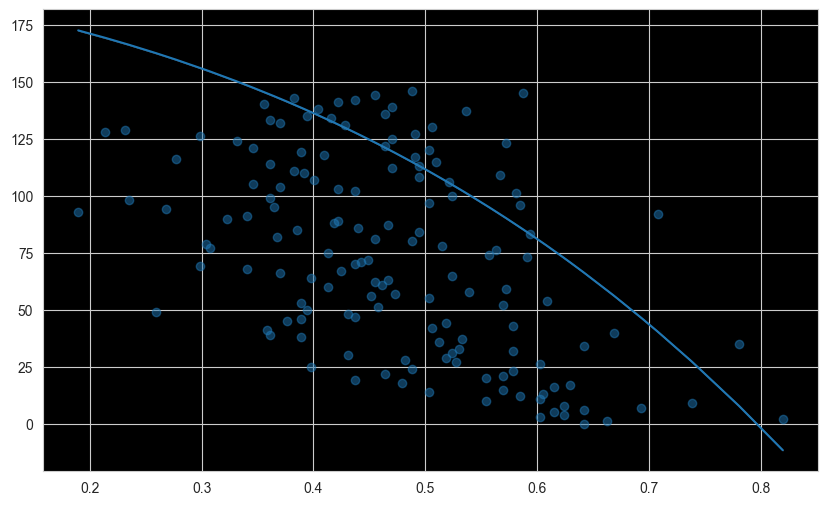

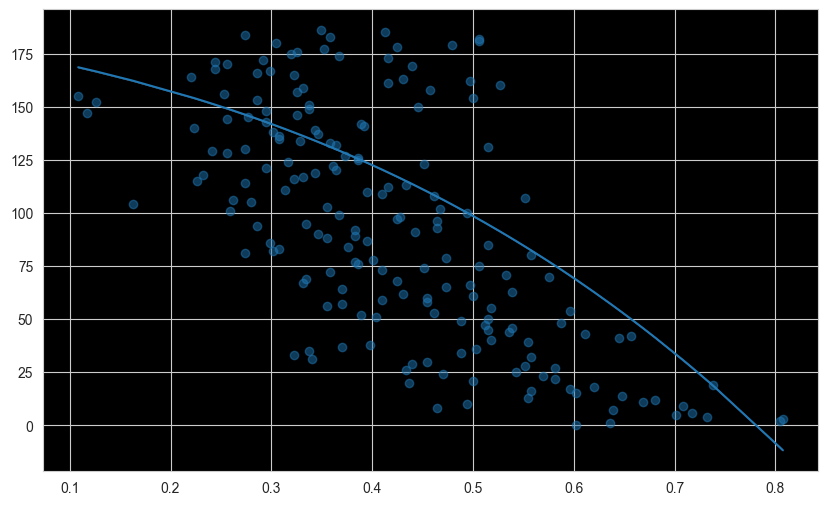

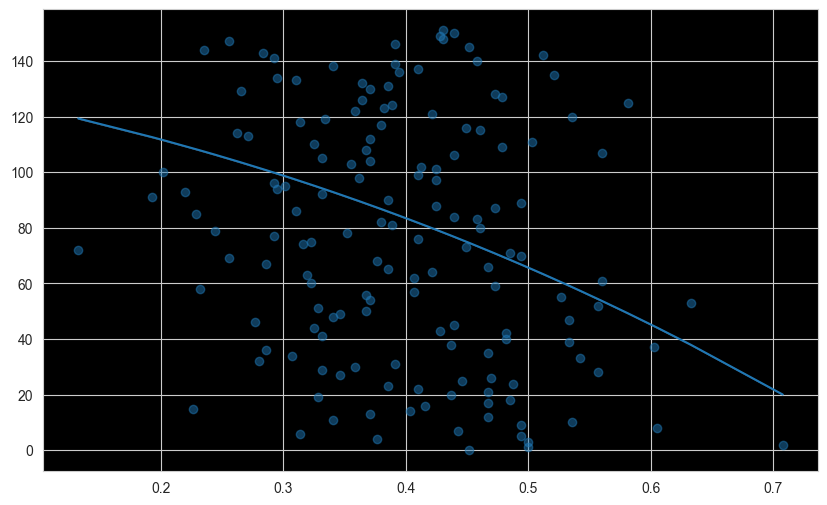

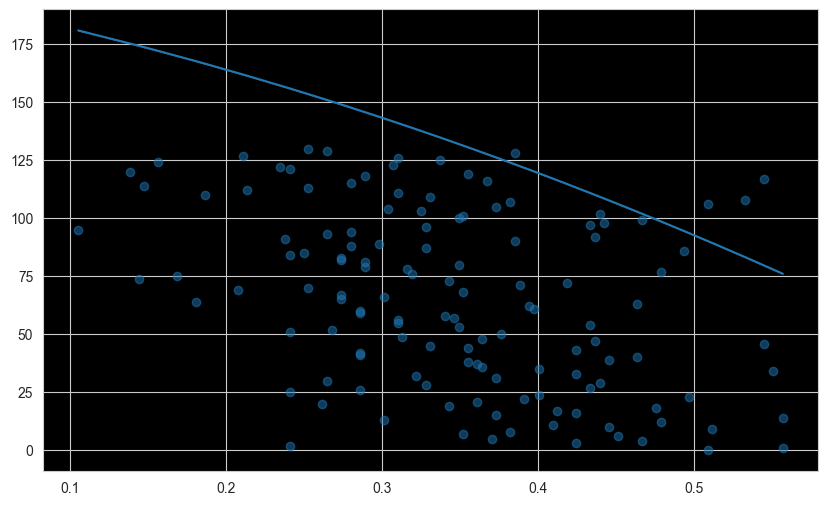

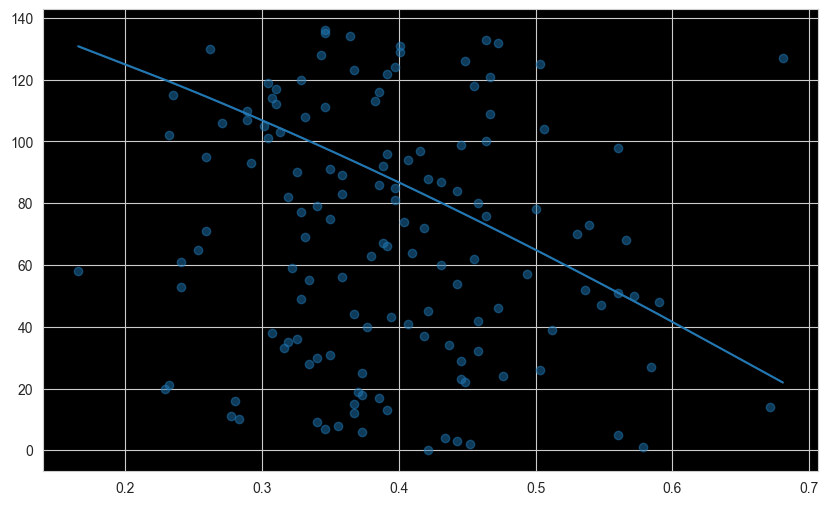

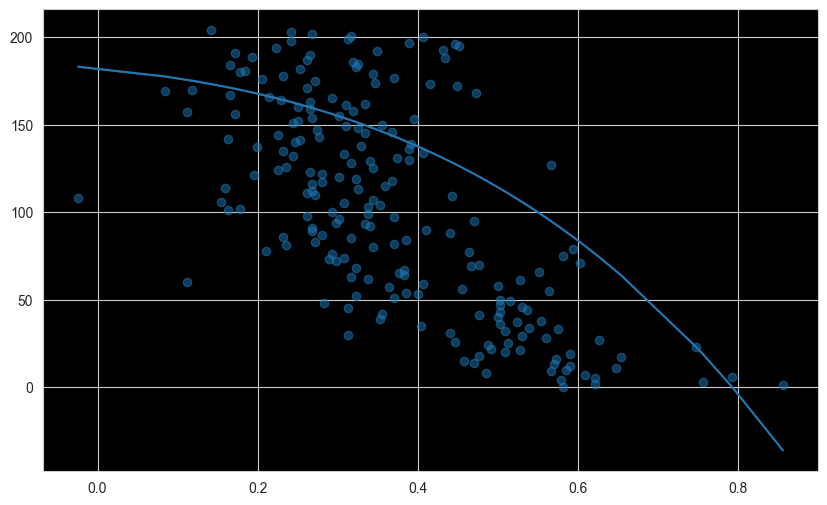

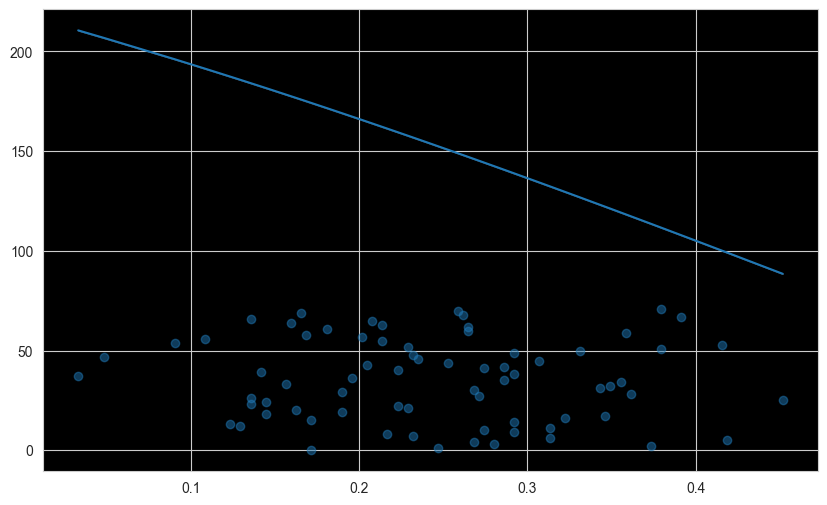

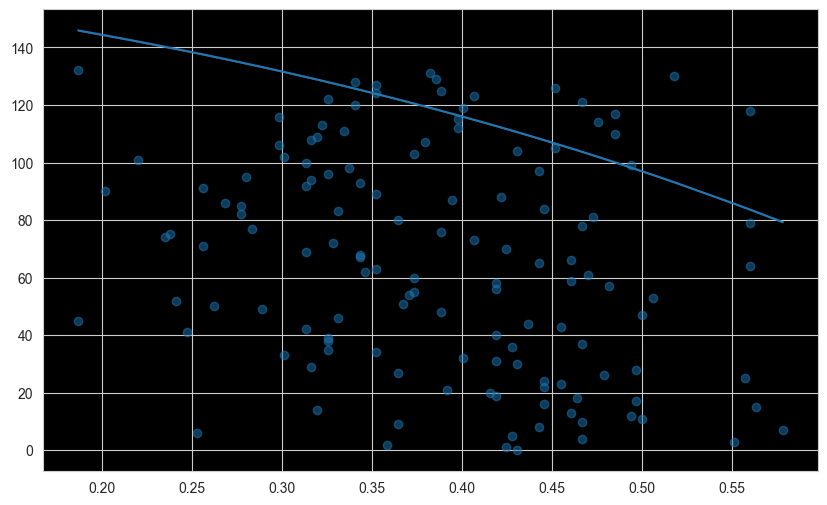

KeyboardInterrupt: 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.m_N = None     # Posterior mean
        self.S_N = None     # Posterior covariance

    def fit(self, X, y):
        N, D = X.shape
        I = np.eye(D)
        self.S_N = np.linalg.inv(self.alpha * I + self.beta * X.T @ X)
        self.m_N = self.beta * self.S_N @ X.T @ y

    def predict(self, X_test):
        mean = X_test @ self.m_N
        variance = (1 / self.beta) + np.sum(X_test @ self.S_N * X_test, axis=1)
        return mean, variance

# Example usage: Assuming df_train and df_test are your DataFrames


# Instantiate the Bayesian Regression model
blr = BayesianLinearRegression()

# Fit Bayesian Regression for each engine (or repeat)
for engine_id in df_train_copy['id'].unique():
    if engine_id % 2 == 0:  # Plot every other engine
        # Training data
        df_engine_train = df_train_copy[df_train_copy['id'] == engine_id]
        X_train = df_engine_train[['s_2']].values
        y_train = df_engine_train['RUL'].values
        
        # Create polynomial features (degree 4)
        X_poly_train = np.vstack([X_train.flatten()**i for i in range(5)]).T
        
        # Test data
        df_engine_test = df_test_copy[df_test_copy['id'] == engine_id]
        X_test = df_engine_test[['s_2']].values
        
        y_test = df_engine_test['RUL'].values
        
        # If no test data, skip this engine
        if len(X_test) == 0:
            continue
            
        # Create polynomial features for test
        X_poly_test = np.vstack([X_test.flatten()**i for i in range(5)]).T
        
        # Set hyperparameters
        alpha = 100
        beta = 1 / (0.05 ** 2)  
        
        # Fit and predict
        blr = BayesianLinearRegression(alpha=alpha, beta=beta)
        
        blr.fit(X_poly_train, y_train)
        mean_pred, var_pred = blr.predict(X_poly_test)
        std_pred = np.sqrt(var_pred)
        
        # Sort for plotting
        sort_idx = np.argsort(X_test.flatten())
        X_sorted = X_test[sort_idx]
        mean_sorted = mean_pred[sort_idx]
        std_sorted = std_pred[sort_idx]
        y_sorted = y_test[sort_idx]
        
        # Plot
        plt.figure(figsize=(10, 6))

        plt.scatter(X_test, y_test, alpha=0.5, label=f'Engine {engine_id} Actual')
        plt.plot(X_sorted, mean_sorted, label=f'Engine {engine_id} Prediction')
        plt.fill_between(X_sorted.flatten(), 
                        mean_sorted - std_sorted, 
                        mean_sorted + std_sorted, 
                        alpha=0.2)

plt.xlabel('Sensor s_2 value')
plt.ylabel('RUL')
plt.title('Bayesian Regression: Test Set Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
import random
x = [1,6,5,4,2]
index =random.choice(x)
random_index_rand = random.randrange(len(x))
print(random_index_rand)
print(x[random_index_rand])

2
5


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random

class BayesianLinearRegression:
    def __init__(self, alpha=1.0, beta=1.0):
        self.alpha = alpha  # Prior precision
        self.beta = beta    # Noise precision
        self.m_N = None     # Posterior mean
        self.S_N = None     # Posterior covariance

    def fit(self, X, y):
        N, D = X.shape
        I = np.eye(D)
        self.S_N = np.linalg.inv(self.alpha * I + self.beta * X.T @ X)
        self.m_N = self.beta * self.S_N @ X.T @ y

    def predict(self, X_test):
        mean = X_test @ self.m_N
        variance = (1 / self.beta) + np.sum(X_test @ self.S_N * X_test, axis=1)
        return mean, np.sqrt(variance)

# Scale features


id    cycles  setting_1  setting_2  setting_3  s_1       s_2       s_3  \
0  0.0  0.016620   0.557471   0.583333        0.0  0.0  0.382530  0.463920   
1  0.0  0.019391   0.304598   0.750000        0.0  0.0  0.406627  0.259865   
2  0.0  0.022161   0.545977   0.583333        0.0  0.0  0.274096  0.434707   
3  0.0  0.024931   0.310345   0.583333        0.0  0.0  0.150602  0.440375   
4  0.0  0.027701   0.603448   0.250000        0.0  0.0  0.322289  0.233486   

        s_4  s_5  ...      s_13      s_14      s_15  s_16      s_17  s_18  \
0  0.261985  0.0  ...  0.220588  0.167097  0.278953   0.0  0.333333   0.0   
1  0.316003  0.0  ...  0.220588  0.160646  0.318199   0.0  0.250000   0.0   
2  0.211850  0.0  ...  0.250000  0.132883  0.184302   0.0  0.333333   0.0   
3  0.307394  0.0  ...  0.264706  0.151925  0.399000   0.0  0.416667   0.0   
4  0.310432  0.0  ...  0.191176  0.209722  0.419777   0.0  0.333333   0.0   

   s_19      s_20      s_21       RUL  
0   0.0  0.744186  0.667219  0.512465  
1   0.0  0.643411  0.574979  0.509695  
2   0.0  0.705426  0.707539  0.506925  
3   0.0  0.627907  0.794256  0.504155  
4   0.0  0.620155  0.807097  0.501385  

[5 rows x 27 columns]

C:\Users\venablecrofta\AppData\Local\Temp\ipykernel_964\1545414155.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


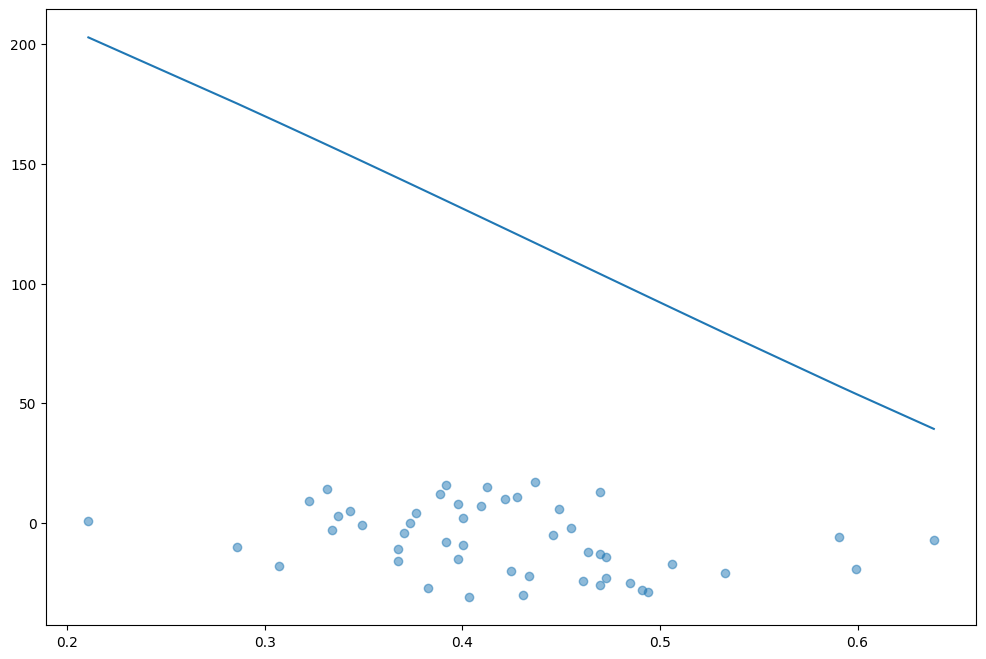

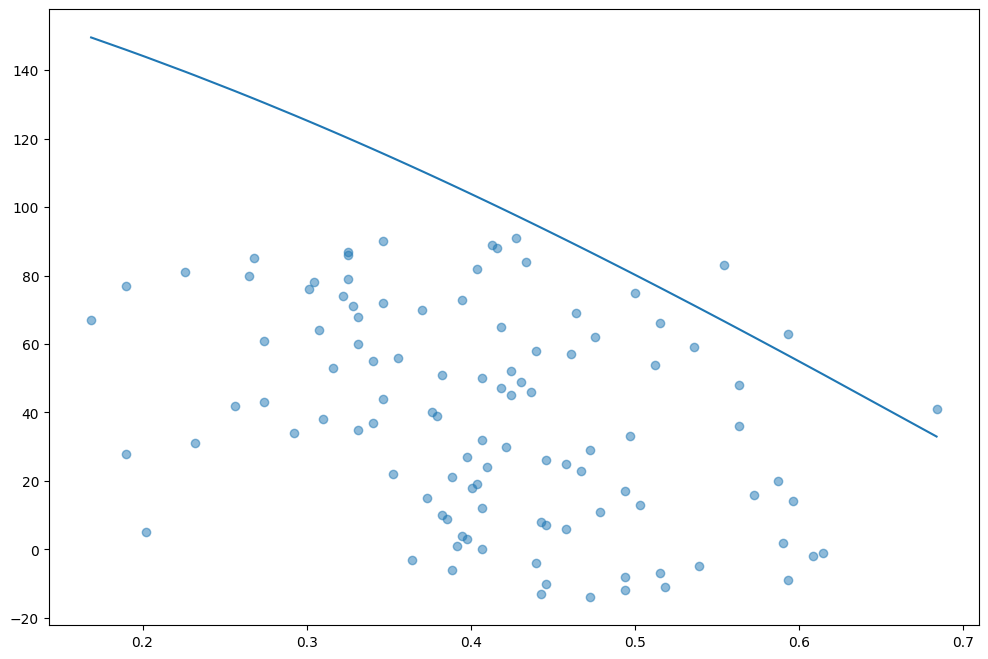

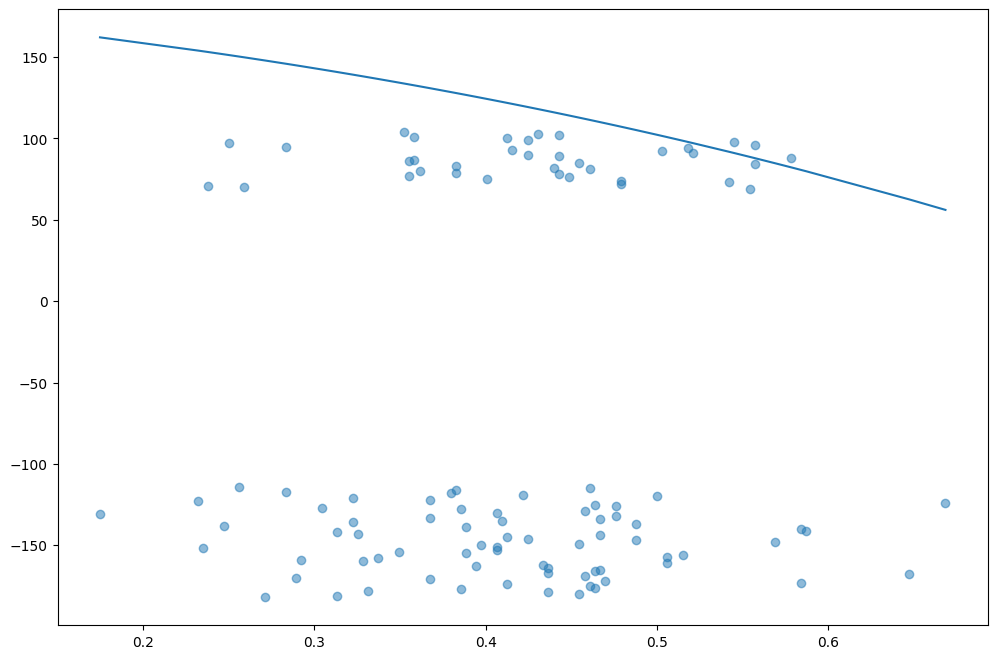

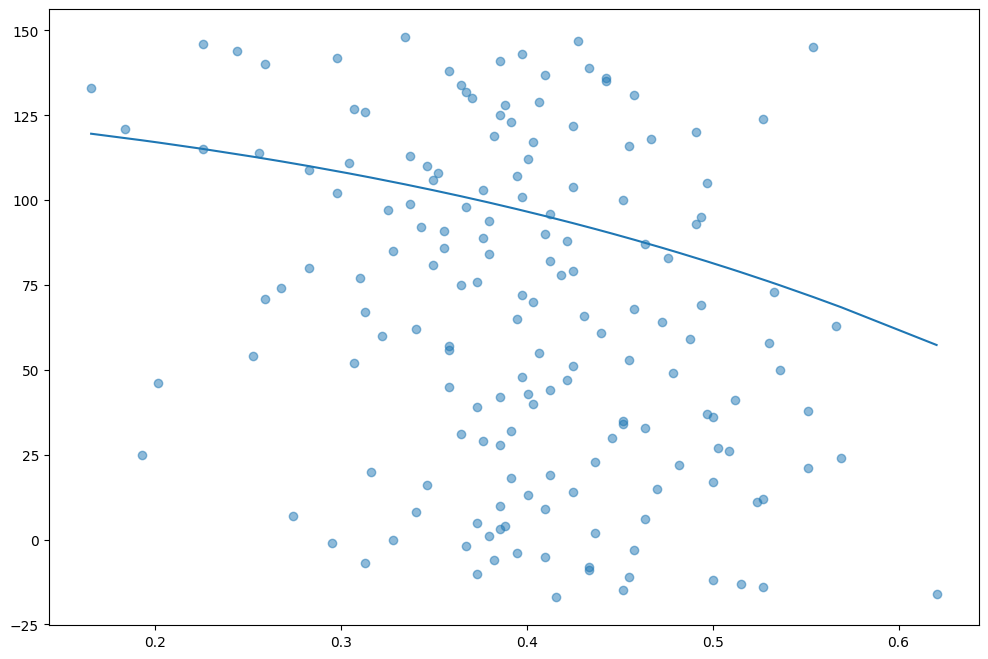

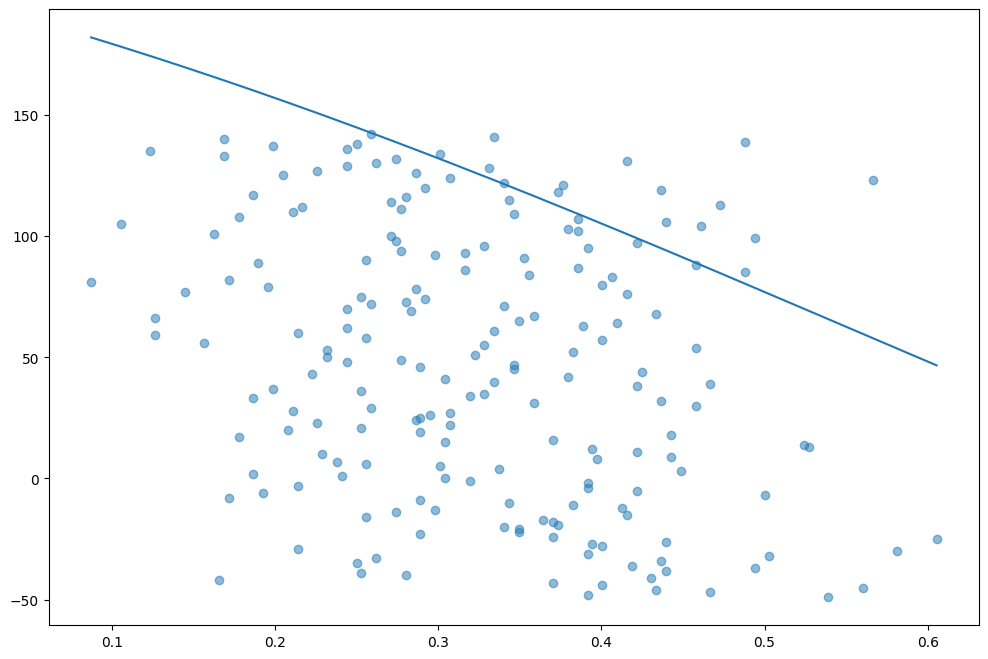

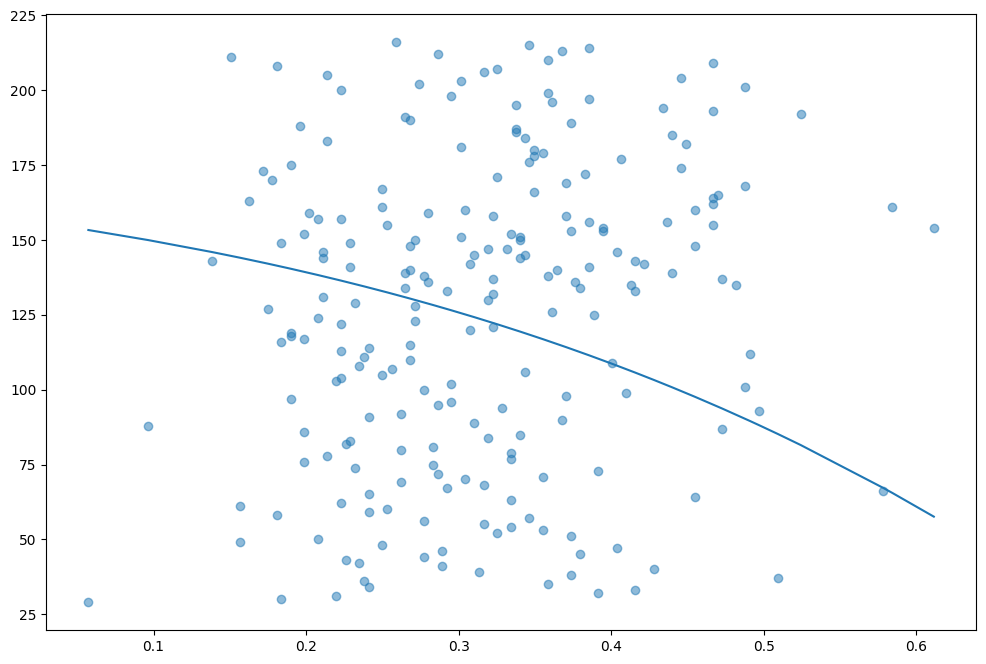

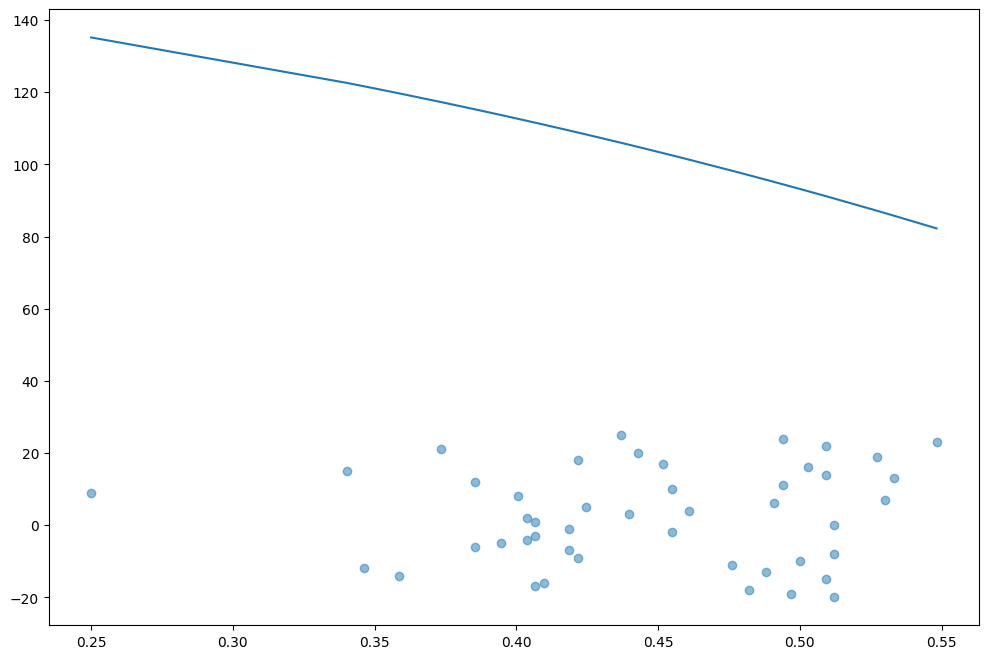

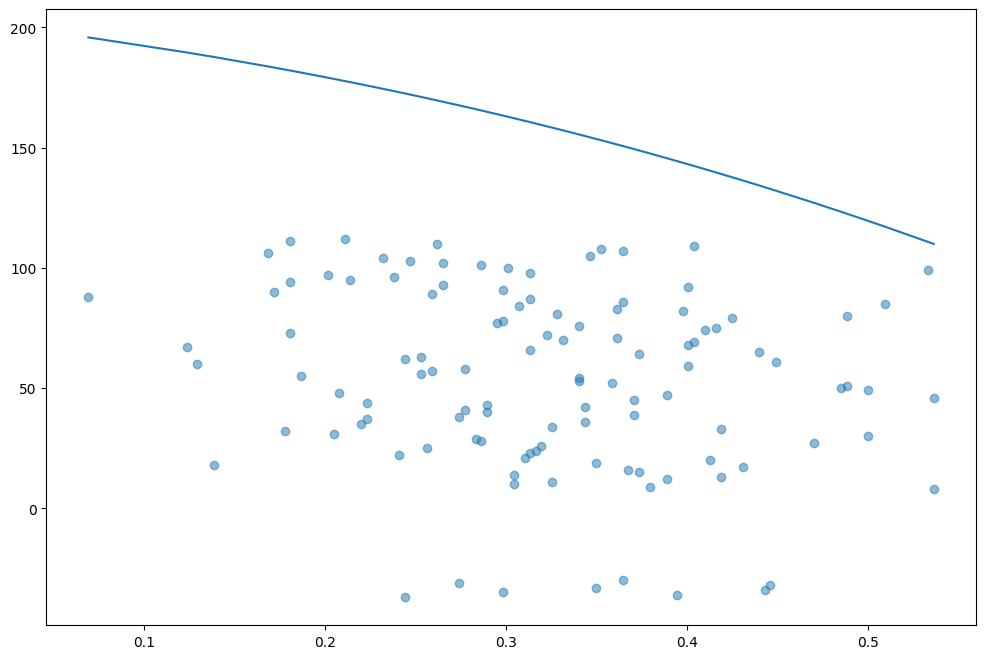

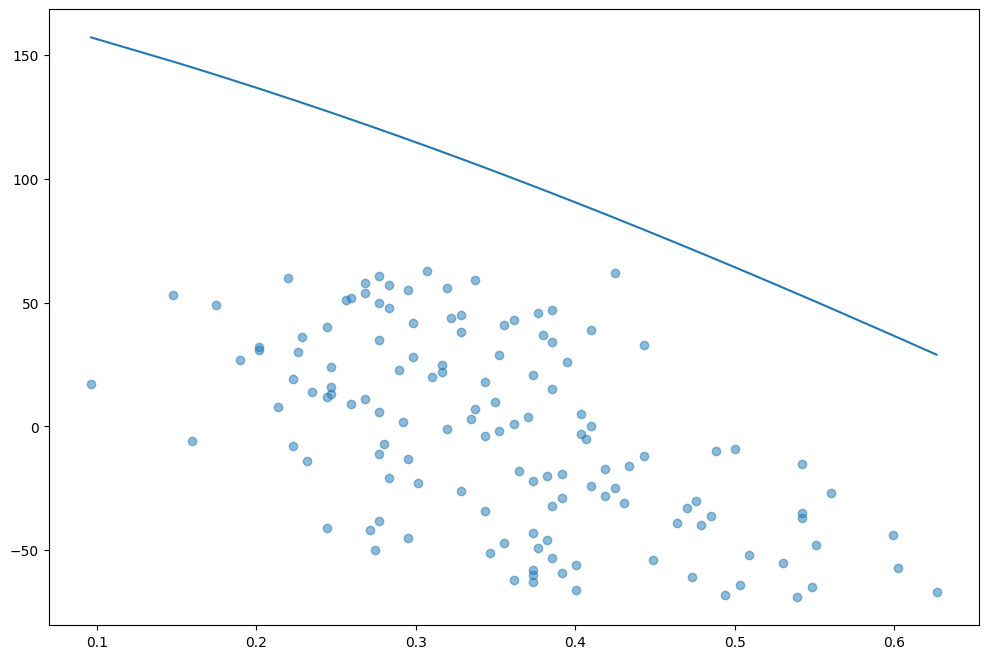

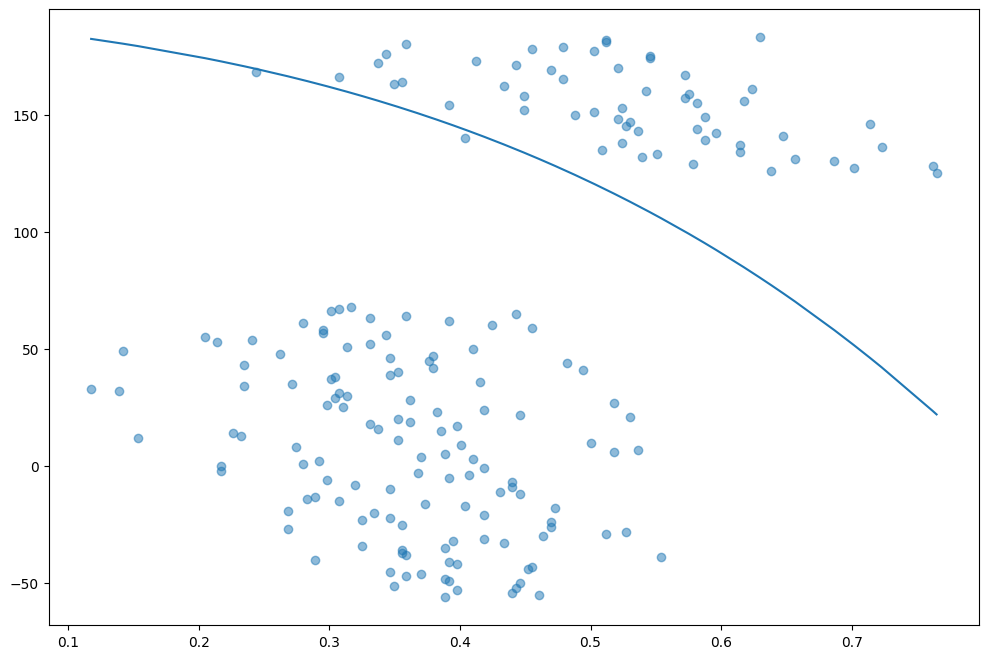

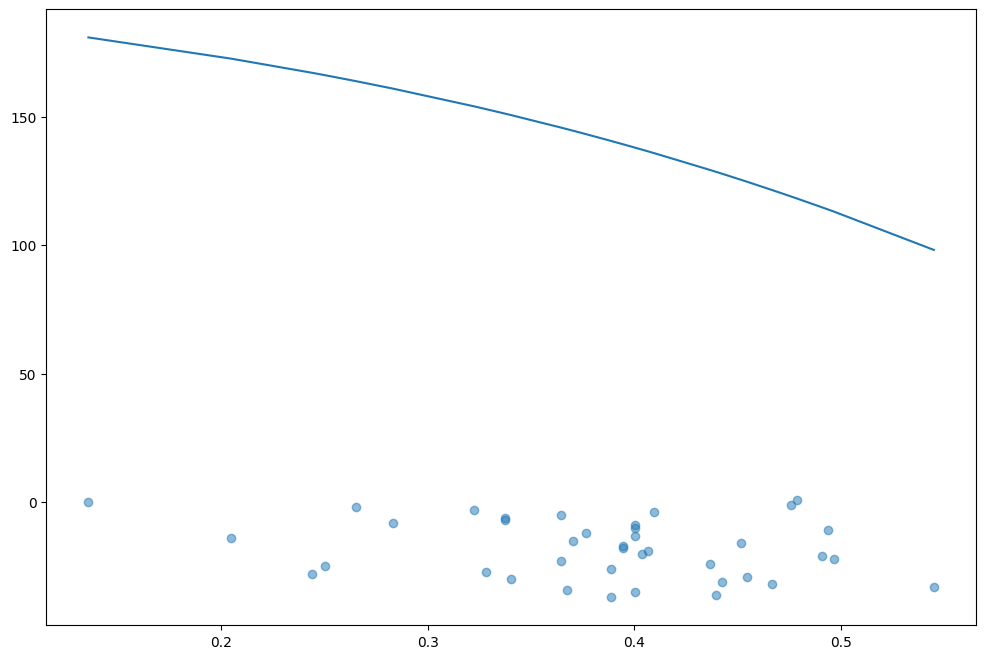

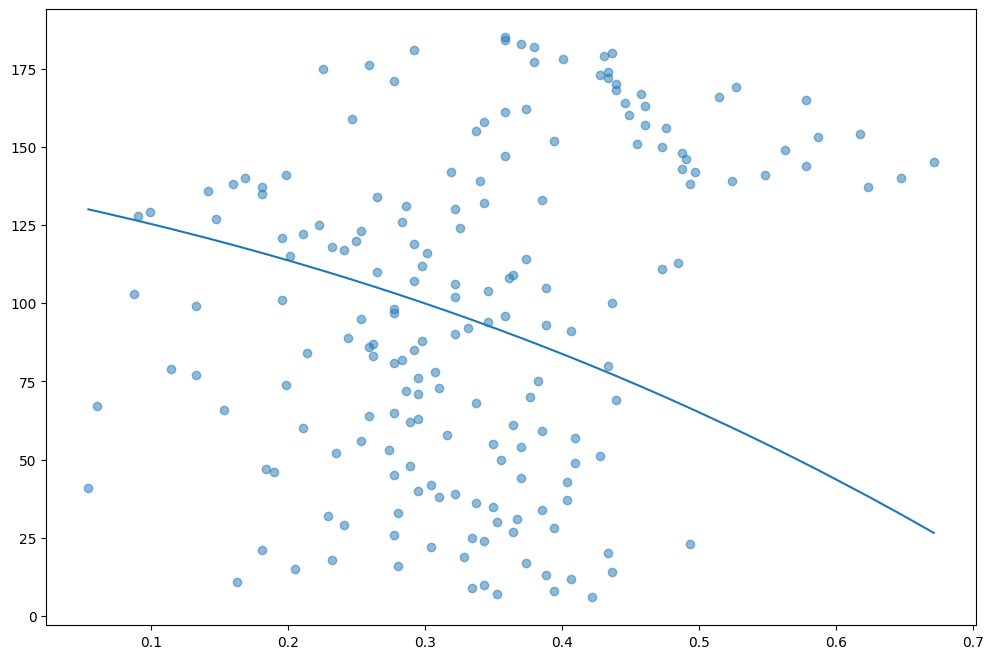

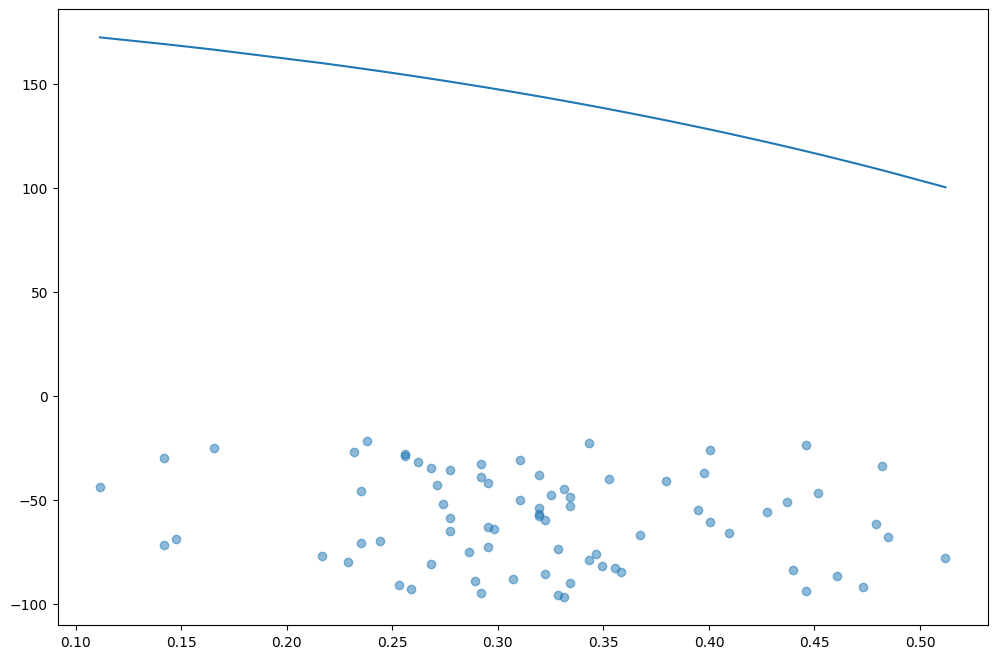

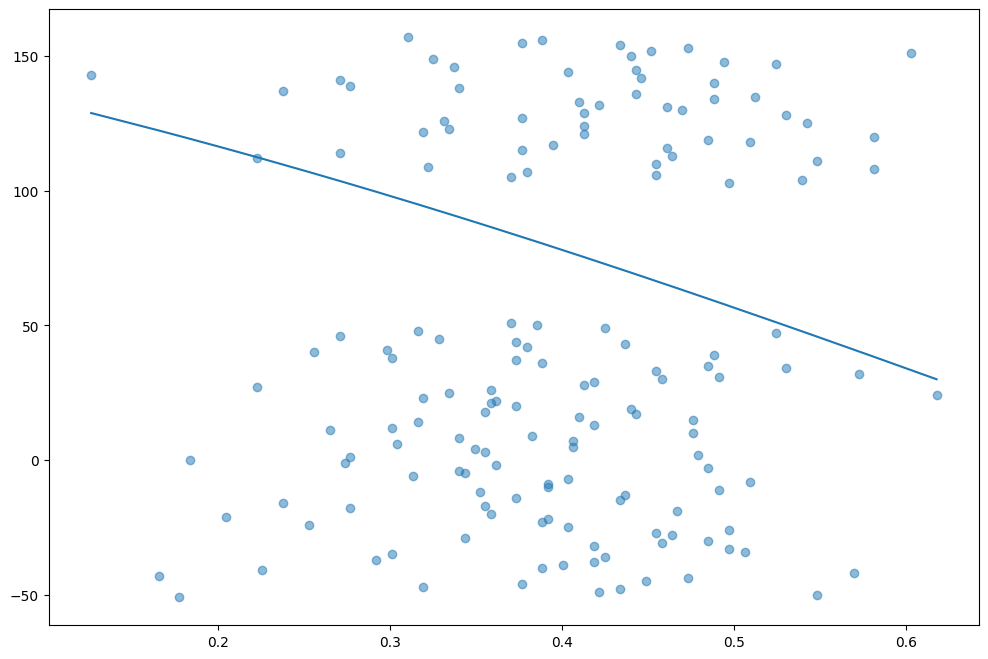

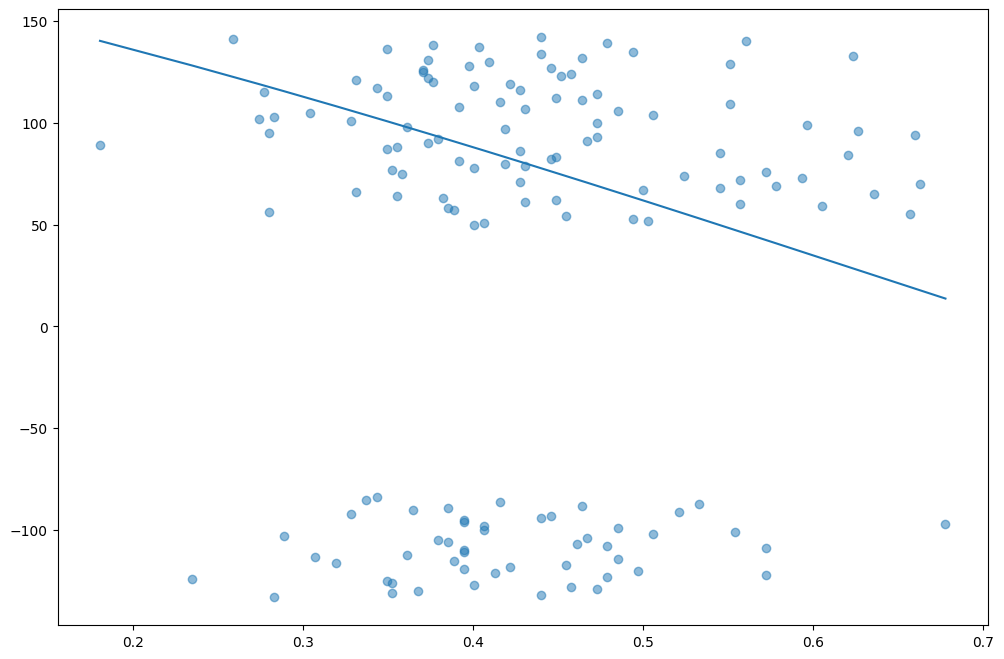

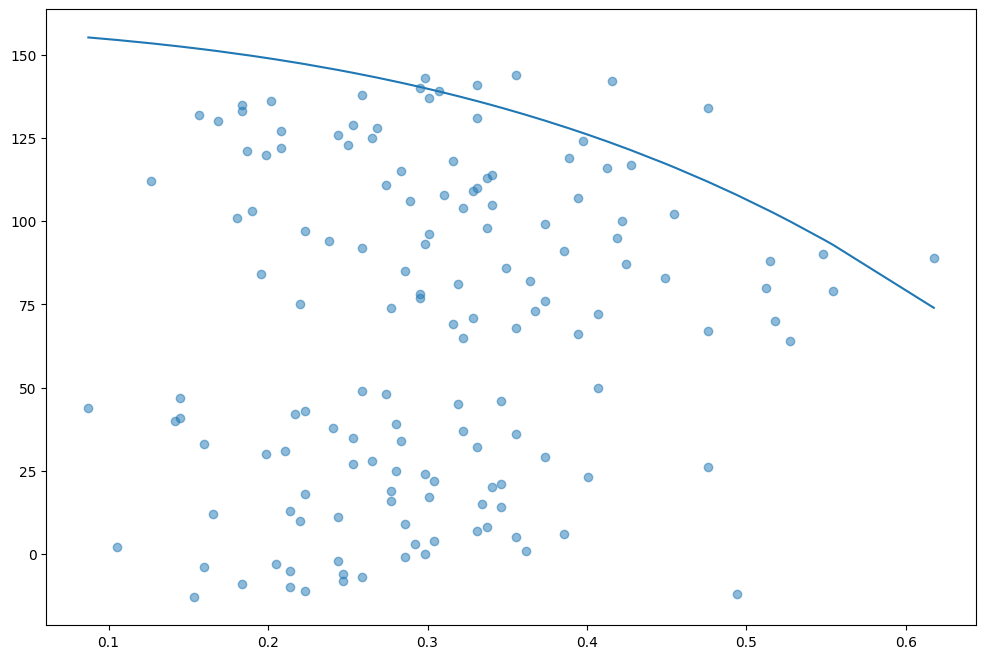

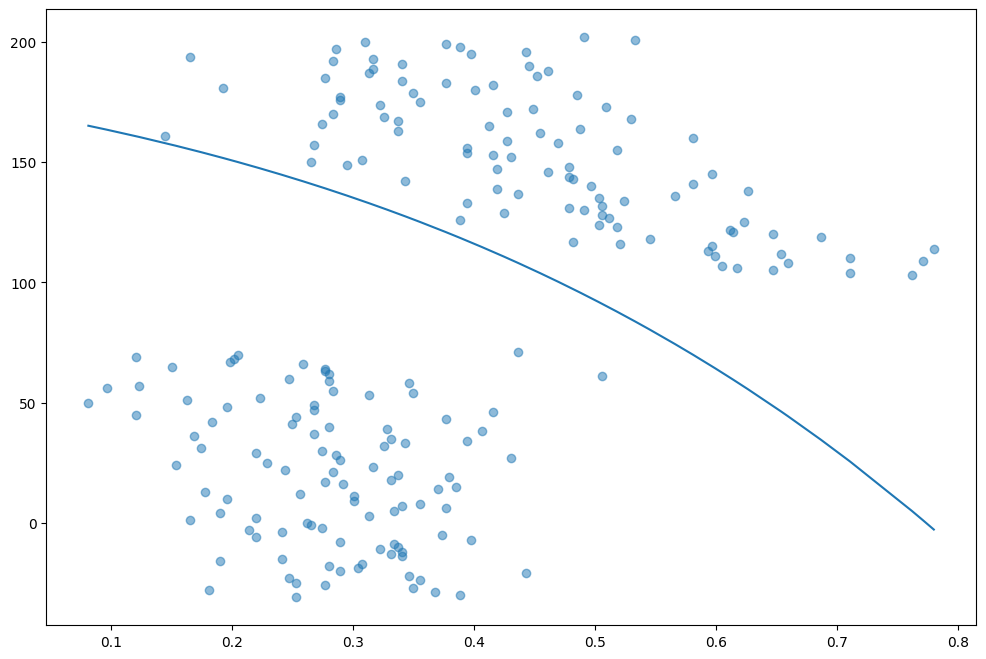

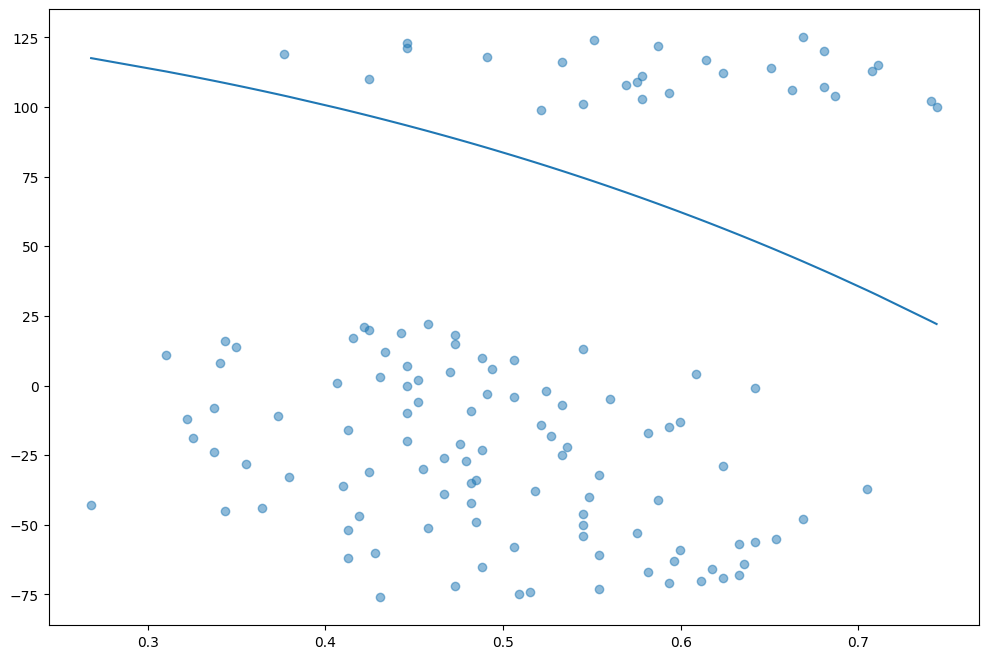

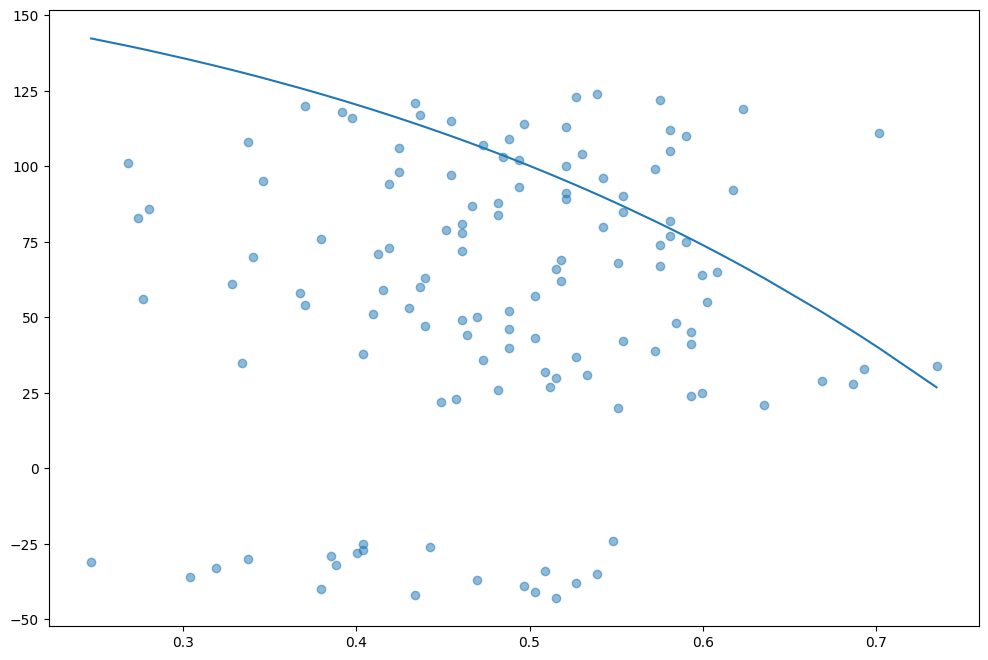

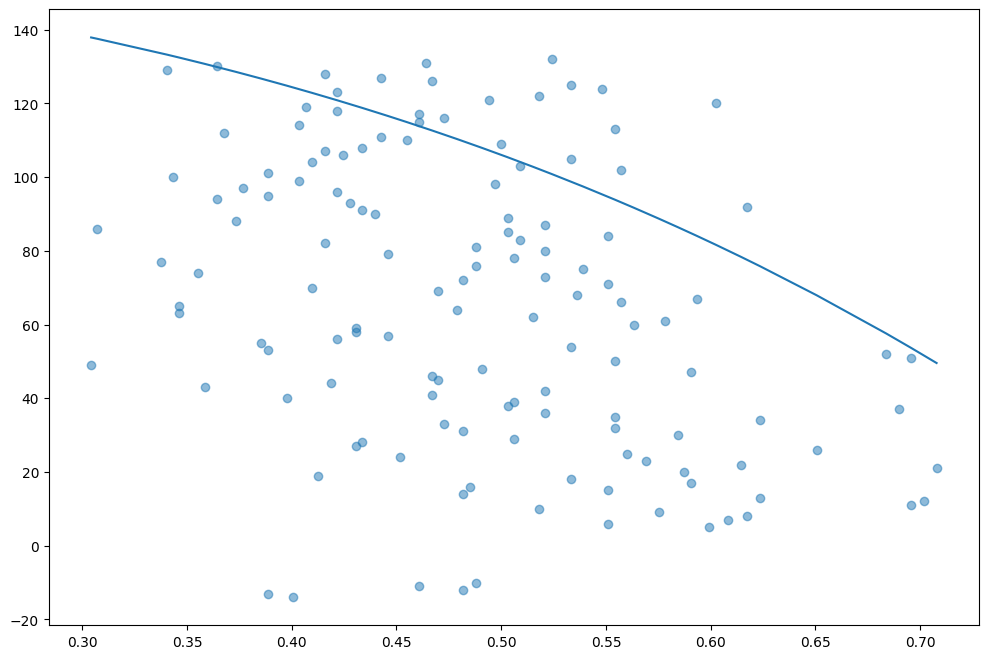

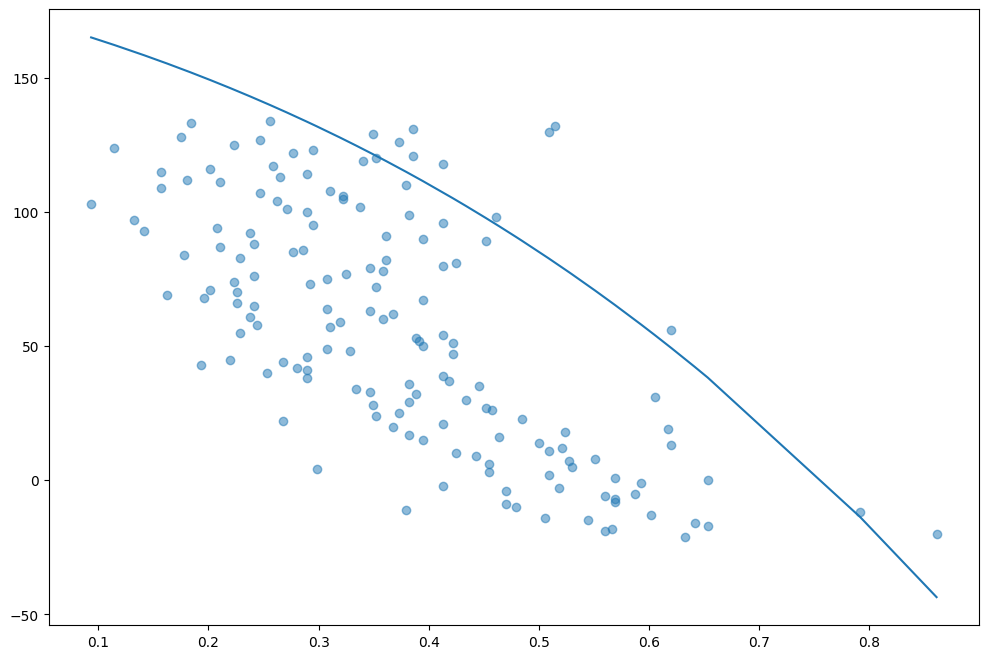

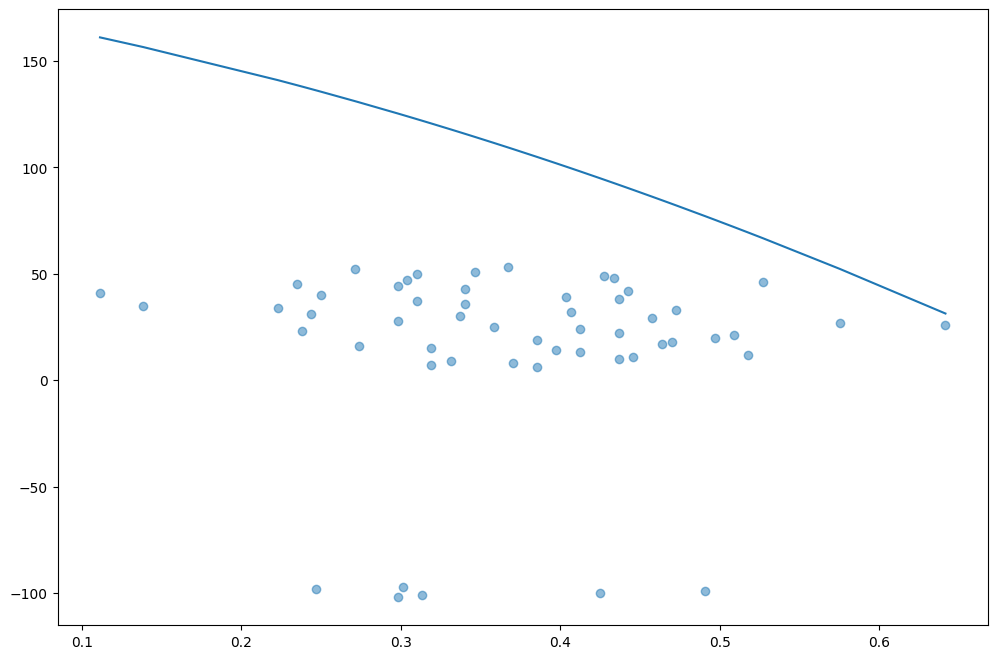

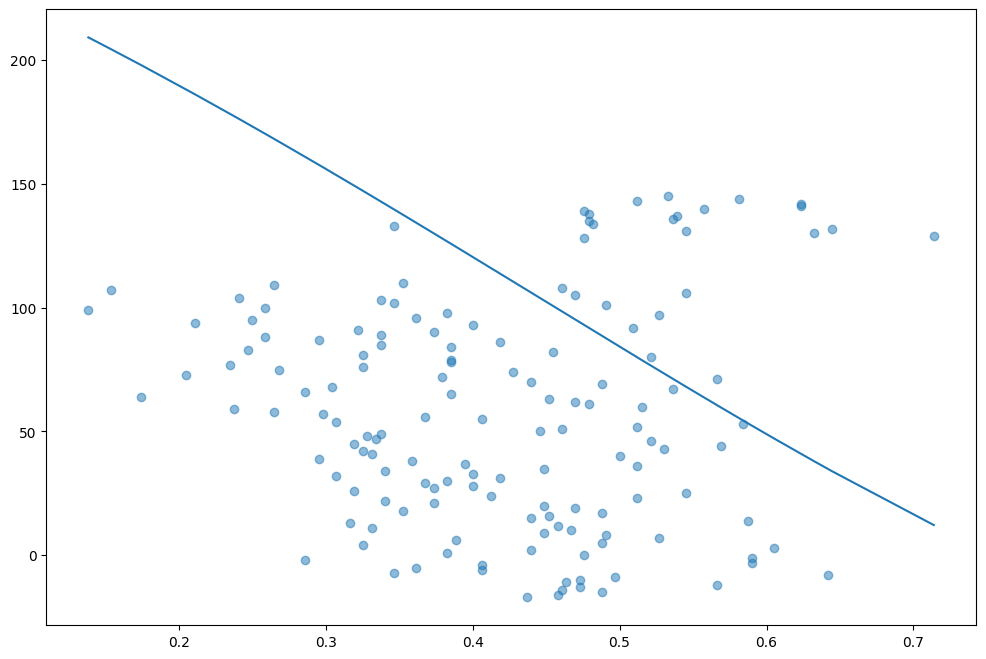

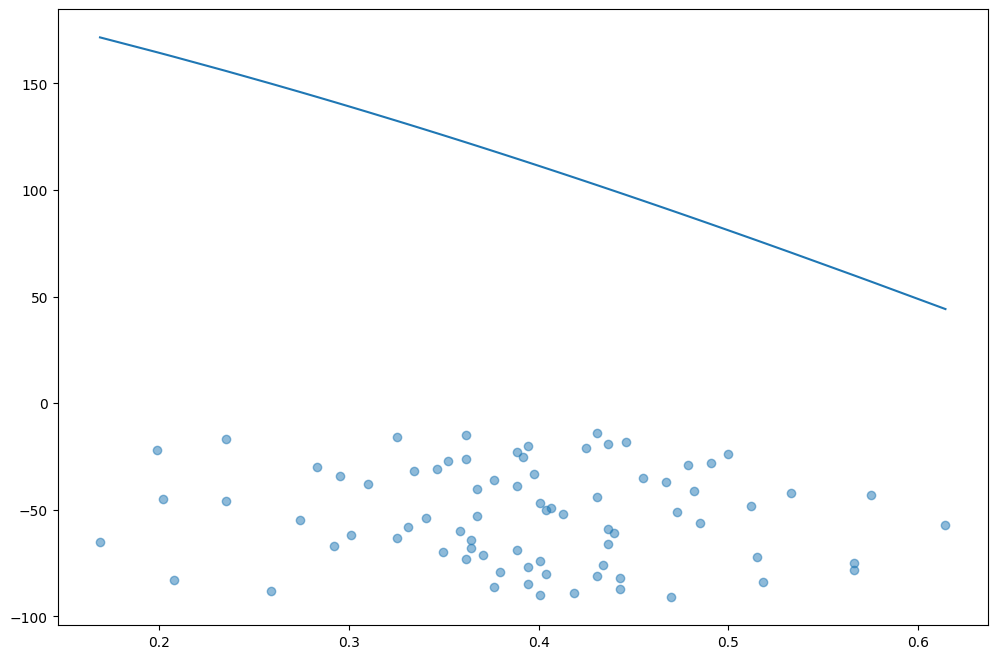

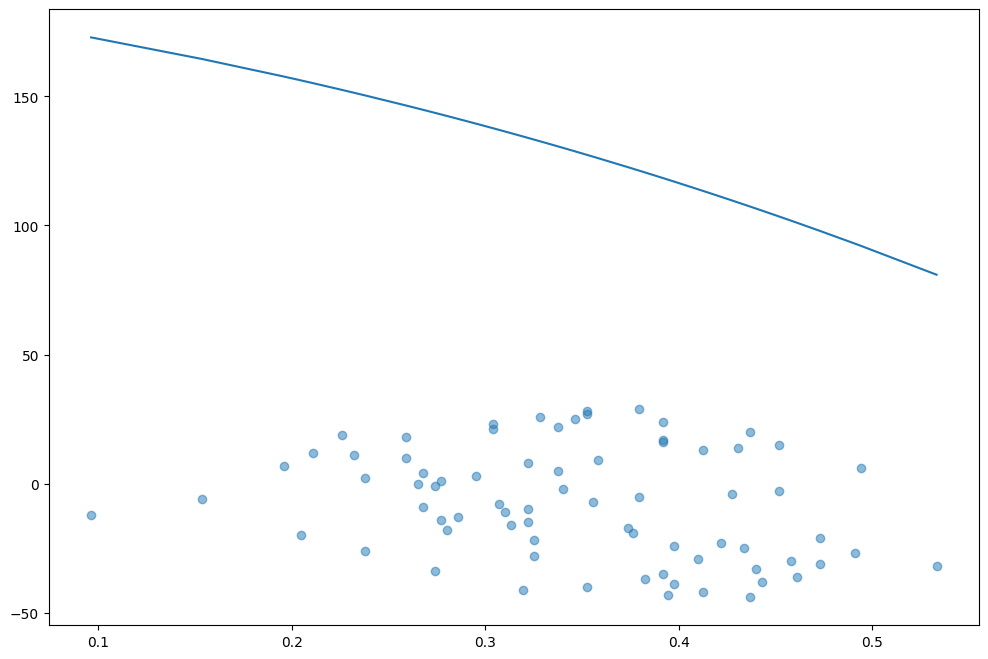

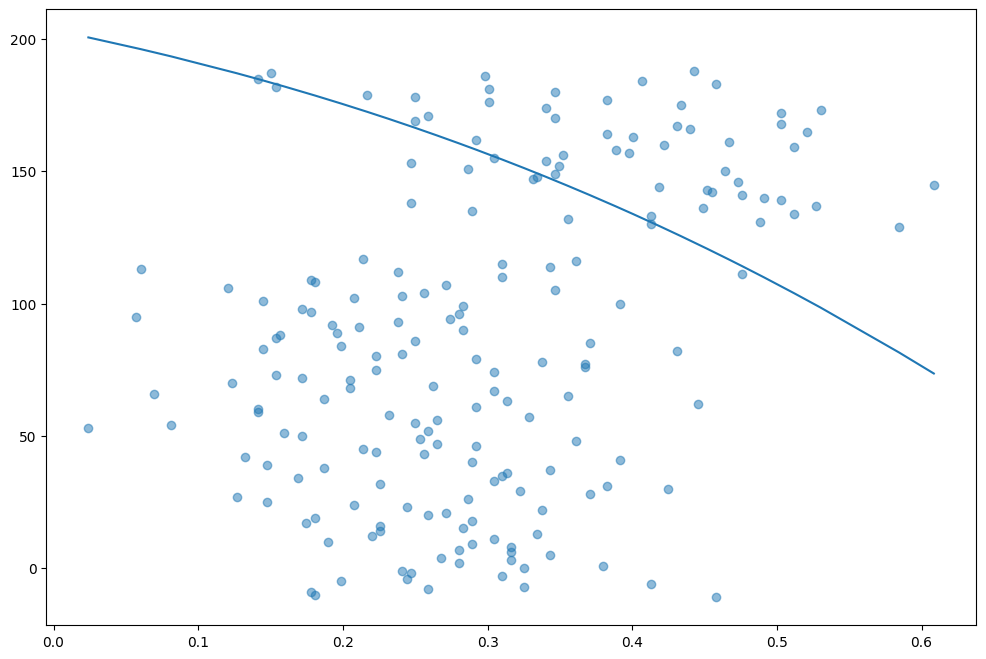

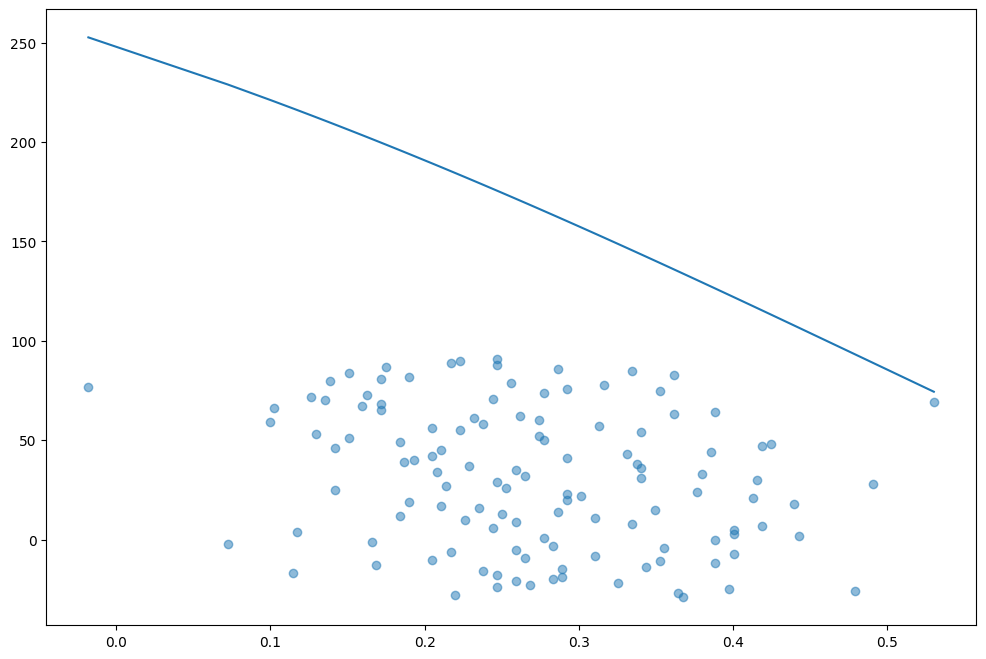

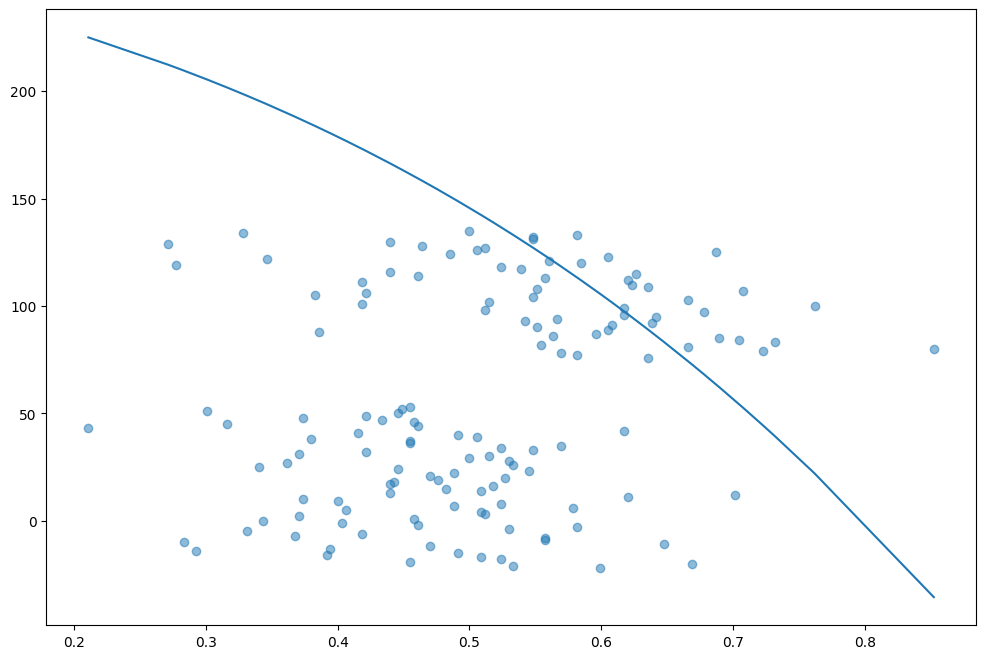

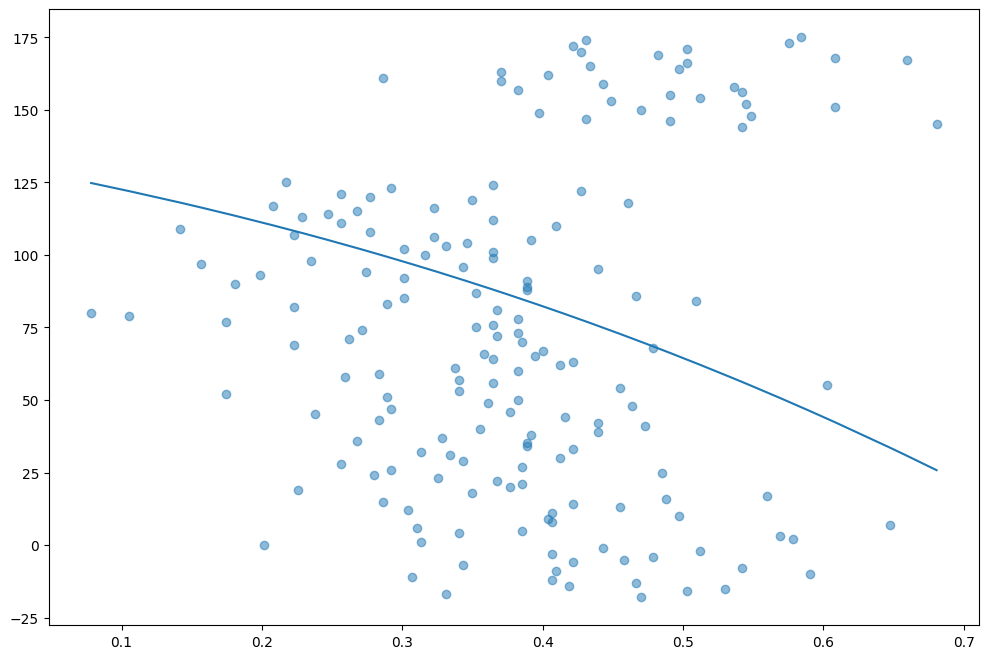

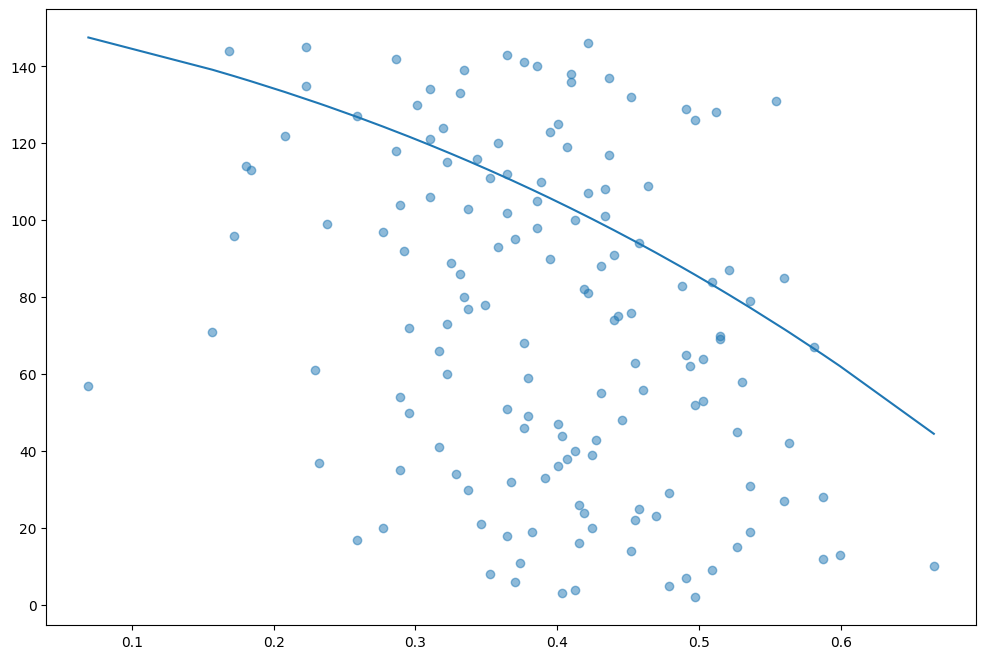

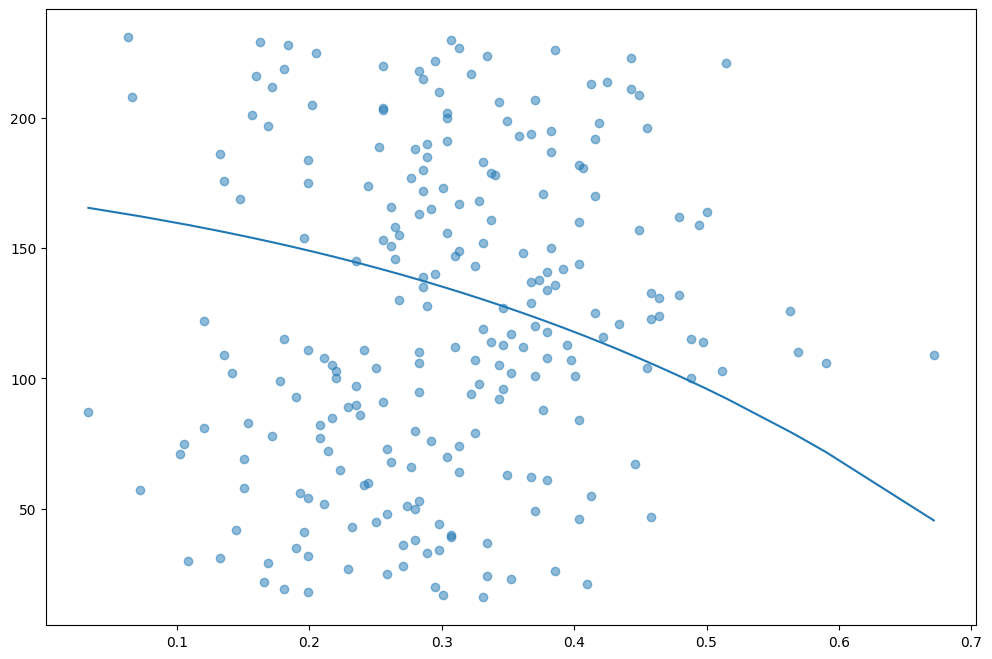

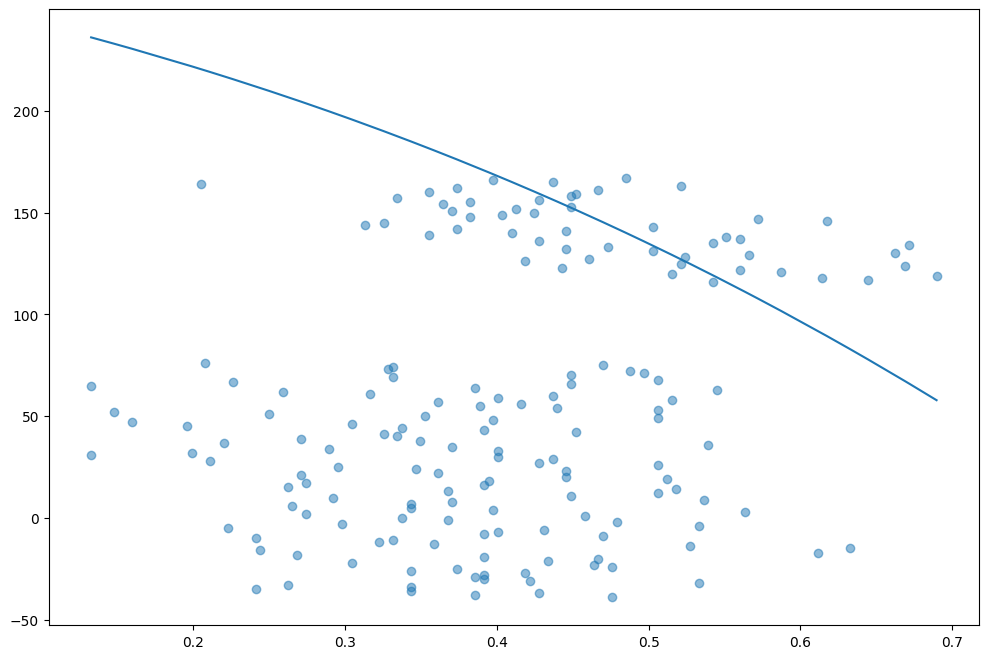

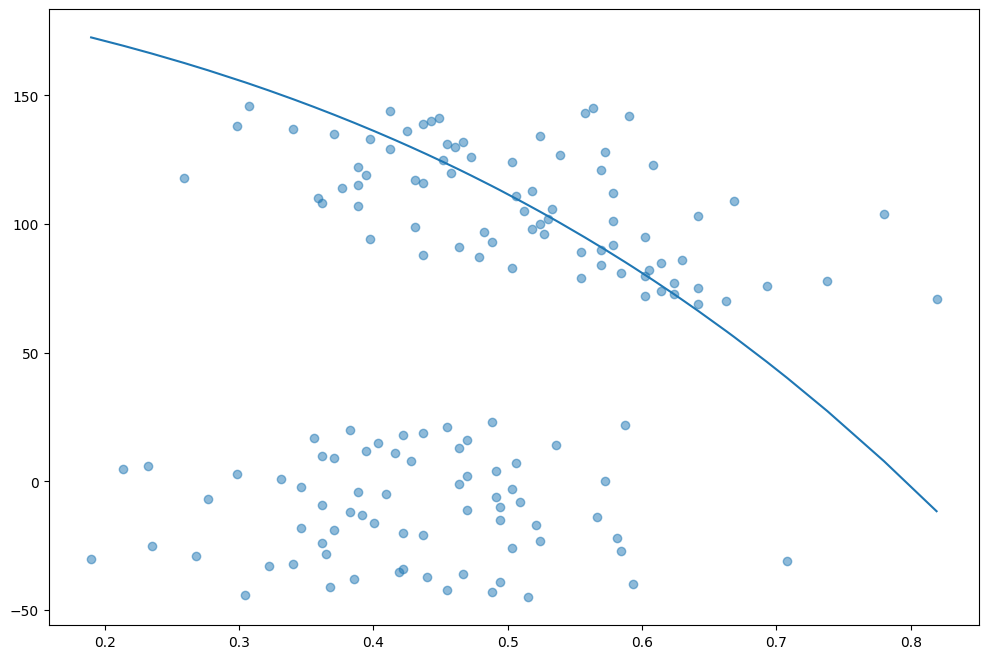

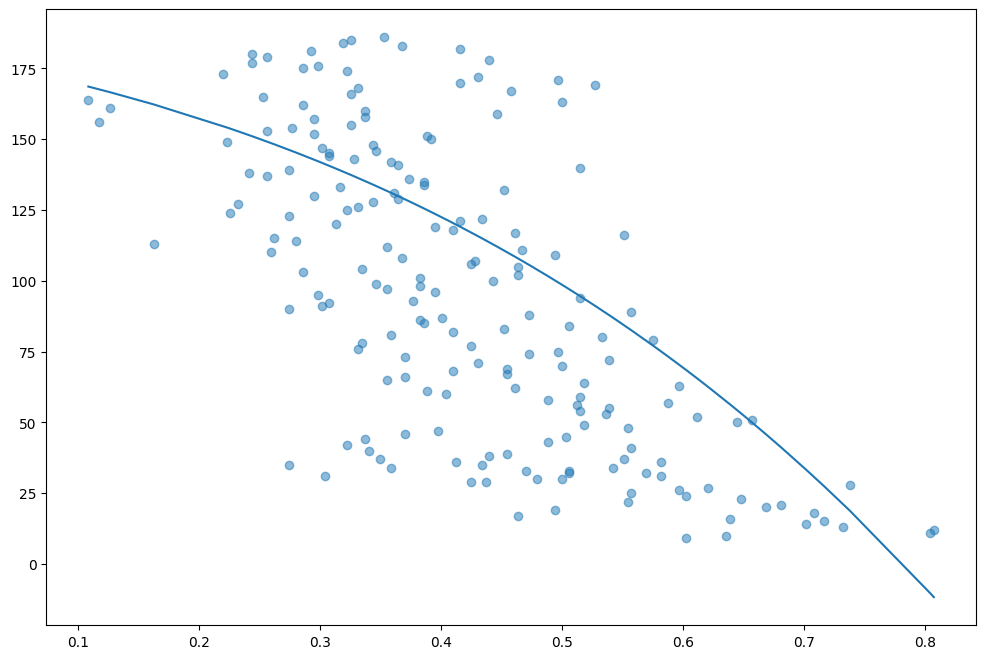

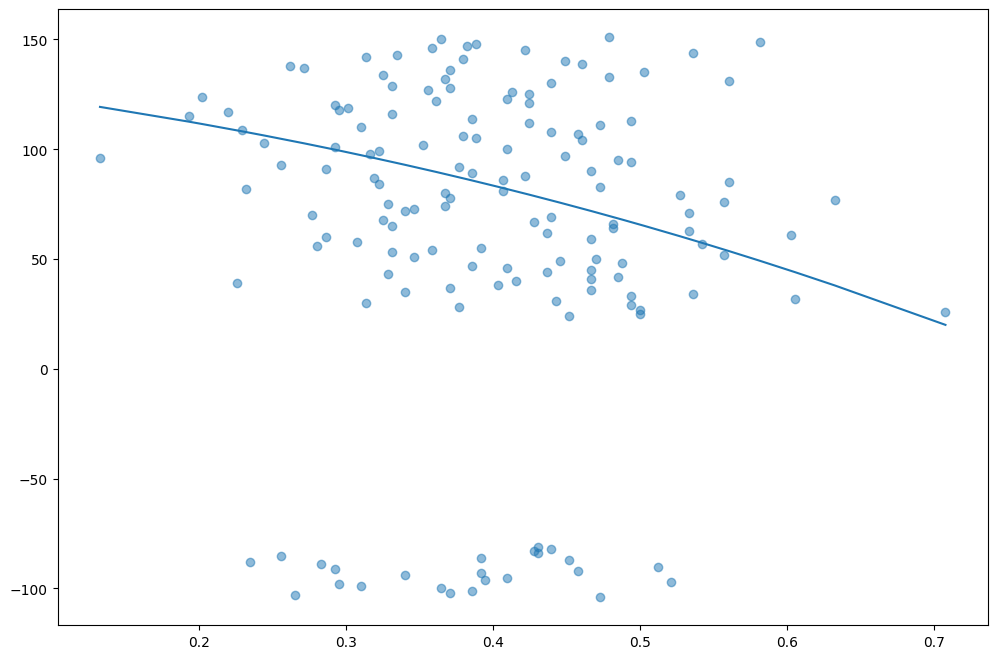

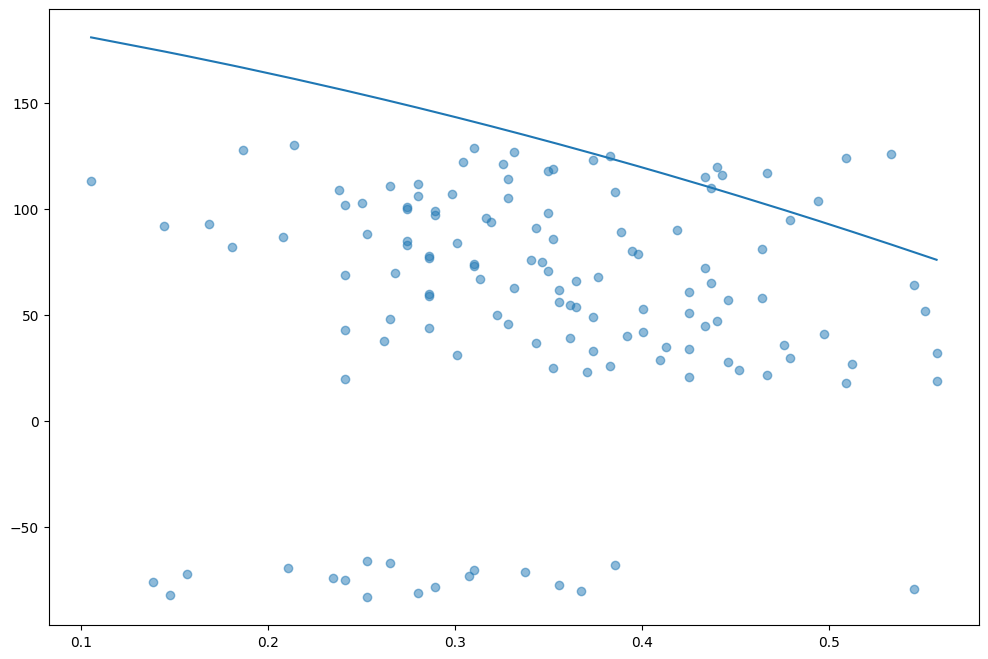

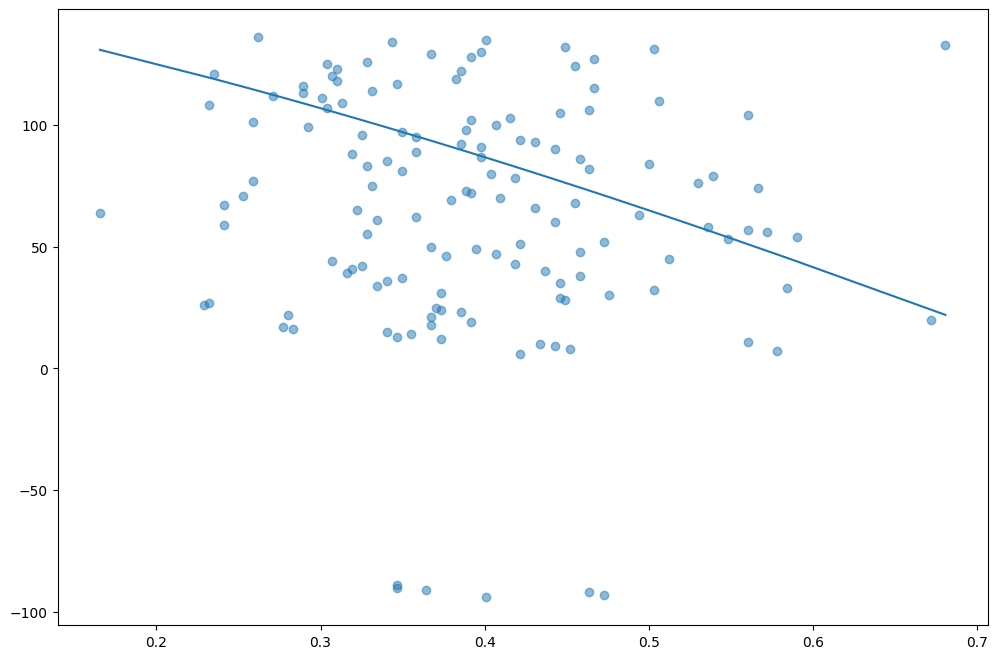

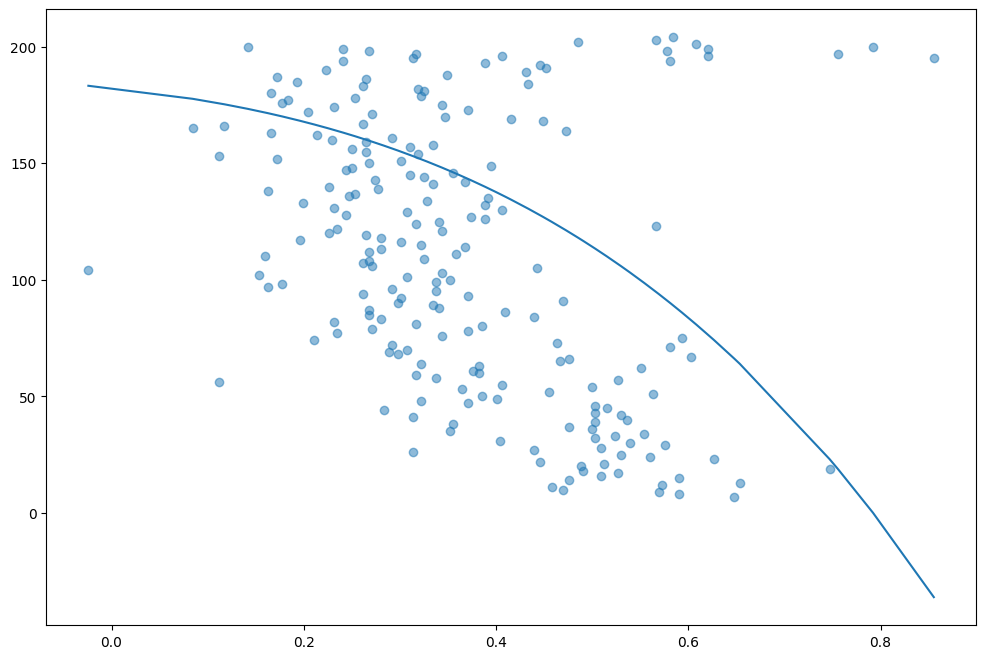

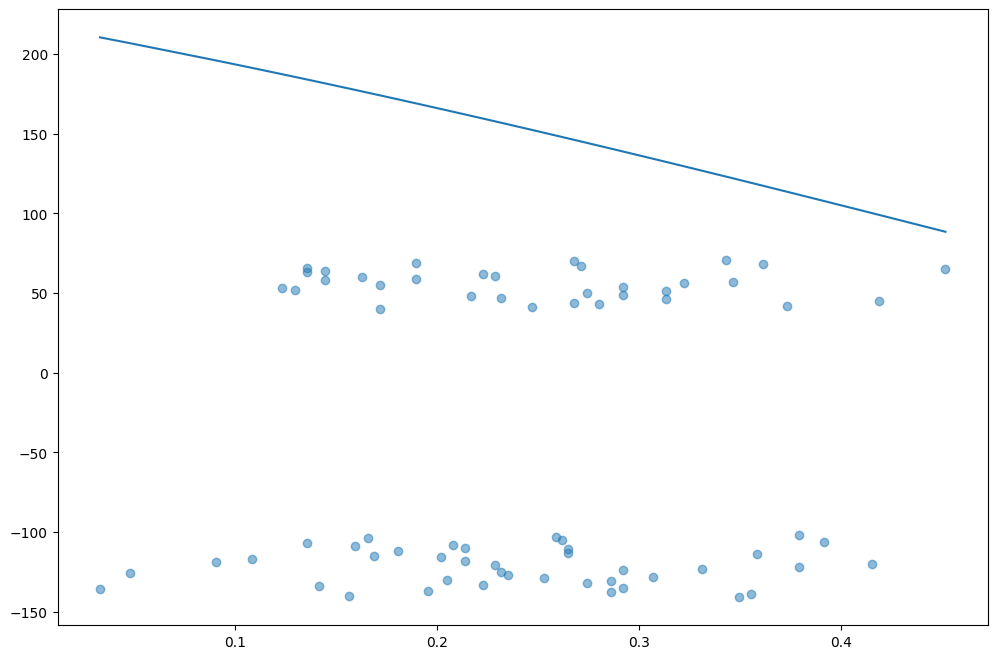

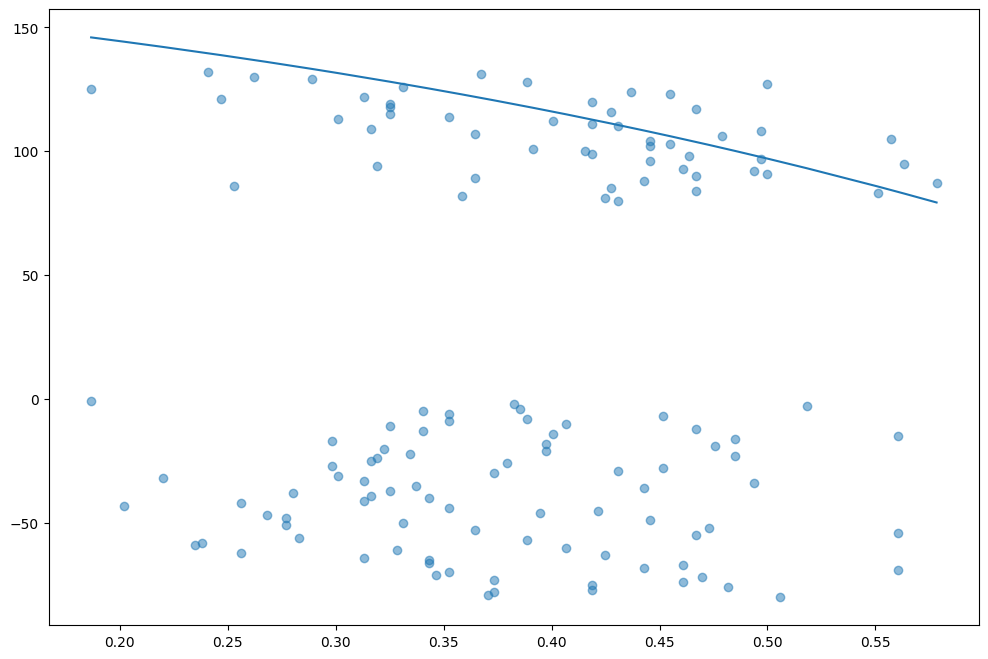

KeyboardInterrupt: 

In [101]:
mean_preds_all = []
std_preds_all = []

# Instantiate the Bayesian Regression model
blr = BayesianLinearRegression(alpha=100, beta=1/(0.05**2))

# Plotting

# Fit and predict for each engine
for engine_id in df_train_copy['id'].unique():
    if engine_id % 2 == 0:  # Plot every other engine
        # Training data
        plt.figure(figsize=(12, 8))

        df_engine_train = df_train_copy[df_train_copy['id'] == engine_id]
        X_train = df_engine_train[['s_2']].values
        y_train = df_engine_train['RUL'].values
        
        # Create polynomial features (degree 4)
        X_poly_train = np.vstack([X_train.flatten()**i for i in range(5)]).T
        
        # Test data
        df_engine_test = df_test_copy[df_test_copy['id'] == engine_id]
        X_test = df_engine_test[['s_2']].values
        y_test = df_engine_test['RUL'].values
        
        # If no test data, skip this engine
        if len(X_test) == 0:
            continue
            
        # Create polynomial features for test
        X_poly_test = np.vstack([X_test.flatten()**i for i in range(5)]).T
        
        # Set hyperparameters
        alpha = 100
        beta = 1 / (0.05 ** 2)  
        
        # Fit and predict
        blr = BayesianLinearRegression(alpha=alpha, beta=beta)
        blr.fit(X_poly_train, y_train)
        mean_pred, var_pred = blr.predict(X_poly_test)
        std_pred = np.sqrt(var_pred)
        
        # Sort for plotting
        sort_idx = np.argsort(X_test.flatten())
        X_sorted = X_test[sort_idx]
        mean_sorted = mean_pred[sort_idx]
        std_sorted = std_pred[sort_idx]
        y_sorted = y_test[sort_idx]
        
        # Plot
        plt.scatter(X_test, y_test, alpha=0.5, label=f'Engine {engine_id} Actual')
        plt.plot(X_sorted, mean_sorted, label=f'Engine {engine_id} Prediction')
        plt.fill_between(X_sorted.flatten(), 
                        mean_sorted - std_sorted, 
                        mean_sorted + std_sorted, 
                        alpha=0.2)

plt.xlabel('Sensor s_2 value')
plt.ylabel('RUL')
plt.title('Bayesian Regression: Test Set Predictions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Optionally average all predictions
# mean_preds_avg = np.mean(mean_preds_all, axis=0)
# std_preds_avg = np.mean(std_preds_all, axis=0)

# Plot vertical line at RUL = 30
# plt.axvline(30, color='red', linestyle='dashed', linewidth=2)

# Labels and aesthetics
plt.xlabel('Sensor 2 (s_2) value')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Bayesian Linear Regression: RUL Prediction with Uncertainty')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

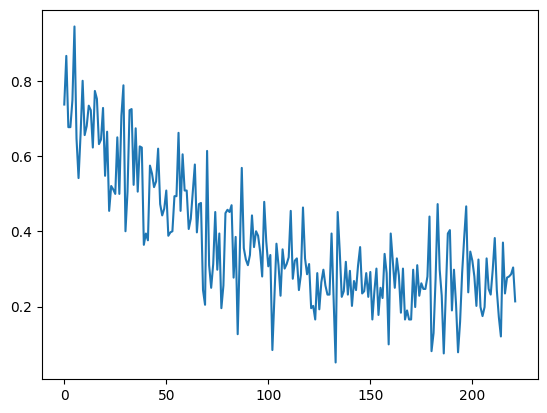

In [102]:
df_engine = df_train_copy[df_train_copy['id'] == 10]
df_engine_test = df_test_copy[df_test_copy['id'] == 10]
X_engine = df_engine[['s_2']].values
np.shape(X_engine)
plt.plot('RUL', sensor_name, 
        data=df_engine, alpha = 1, label = f'Engine {i}')

